In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/twhit/smc_object_detection/")
from utils.misc import select_cuda_device

device = select_cuda_device()

### Load in ground truth

In [ ]:
images = torch.load('../data/images.pt')
true_counts = torch.load('../data/true_counts.pt')
true_locs = torch.load('../data/true_locs.pt')
true_fluxes = torch.load('../data/true_fluxes.pt')

num_counts = true_counts.max().item() + 1  # |{0,1,2,...,max_count}|

### Load in SMC results

In [ ]:
num_batches = 100
batch_size = 10
prior_max_objects = 5
num_catalogs_per_count = 200
num_catalogs = num_catalogs_per_count * (prior_max_objects + 1)

smcmh_runtime = torch.zeros([num_batches, batch_size])
smcmh_num_iters = torch.zeros([num_batches, batch_size])
smcmh_counts = torch.zeros([num_batches, batch_size, num_catalogs])
smcmh_locs = torch.zeros([num_batches, batch_size, num_catalogs, 10 * prior_max_objects, 2])
smcmh_fluxes = torch.zeros([num_batches, batch_size, num_catalogs, 10 * prior_max_objects])

smcmala_runtime = torch.zeros([num_batches, batch_size])
smcmala_num_iters = torch.zeros([num_batches, batch_size])
smcmala_counts = torch.zeros([num_batches, batch_size, num_catalogs])
smcmala_locs = torch.zeros([num_batches, batch_size, num_catalogs, 10 * prior_max_objects, 2])
smcmala_fluxes = torch.zeros([num_batches, batch_size, num_catalogs, 10 * prior_max_objects])

for b in range(num_batches):
    # smcmh_counts[b] = torch.load(f'smc_mh/counts_{b}.pt')
    # smcmh_locs[b] = torch.load(f'smc_mh/locs_{b}.pt')
    # smcmh_fluxes[b] = torch.load(f'smc_mh/fluxes_{b}.pt')
    # smcmh_runtime[b] = torch.load(f'smc_mh/runtime_{b}.pt')
    # smcmh_num_iters[b] = torch.load(f'smc_mh/num_iters_{b}.pt')
    
    smcmala_counts[b] = torch.load(f'smc_mala/counts_{b}.pt')
    smcmala_locs[b] = torch.load(f'smc_mala/locs_{b}.pt')
    smcmala_fluxes[b] = torch.load(f'smc_mala/fluxes_{b}.pt')
    smcmala_runtime[b] = torch.load(f'smc_mala/runtime_{b}.pt')
    smcmala_num_iters[b] = torch.load(f'smc_mala/num_iters_{b}.pt')

smcmh_counts = smcmh_counts.flatten(0,1)
smcmh_locs = smcmh_locs.flatten(0,1)
smcmh_fluxes = smcmh_fluxes.flatten(0,1)
smcmh_runtime = smcmh_runtime.flatten(0,1)
smcmh_num_iters = smcmh_num_iters.flatten(0,1)

smcmala_counts = smcmala_counts.flatten(0,1)
smcmala_locs = smcmala_locs.flatten(0,1)
smcmala_fluxes = smcmala_fluxes.flatten(0,1)
smcmala_runtime = smcmala_runtime.flatten(0,1)
smcmala_num_iters = smcmala_num_iters.flatten(0,1)

### Load in SEP results

In [ ]:
sep_counts = torch.load('sep/counts.pt')
sep_locs = torch.load('sep/locs.pt')
sep_fluxes = torch.load('sep/fluxes.pt')
sep_runtime = torch.load('sep/runtime.pt')

### Plot attributes

In [ ]:
smcmh_color = "darkblue"
smcmh_marker = 'o'
sep_color = "darkred"
sep_marker = 's'
smcmala_color = "forestgreen"
smcmala_marker = 'v'
fontsize = 16
cmap = 'gray'

---

### Summary statistics across all images

##### MAE, RMSE, and classification accuracy of number of stars

SMC with MH kernel:

In [ ]:
print(f'mae = {(smcmh_counts.mode(-1).values - true_counts).abs().mean()}')
print(f'rmse = {((smcmh_counts.mode(-1).values - true_counts) ** 2).mean().sqrt()}')
print(f'accuracy = {(smcmh_counts.mode(-1).values == true_counts).float().mean() * 100}%')

SMC with MALA kernel:

In [7]:
print(f'mae = {(smcmala_counts.mode(-1).values - true_counts).abs().mean()}')
print(f'rmse = {((smcmala_counts.mode(-1).values - true_counts) ** 2).mean().sqrt()}')
print(f'accuracy = {(smcmala_counts.mode(-1).values == true_counts).float().mean() * 100}%')

mae = 1.128000020980835
rmse = 1.648635745048523
accuracy = 37.20000076293945%


Source Extractor (SEP):

In [8]:
print(f'mae = {(sep_counts - true_counts).abs().mean()}')
print(f'rmse = {((sep_counts - true_counts) ** 2).mean().sqrt()}')
print(f'accuracy = {(sep_counts == true_counts).float().mean() * 100}%')

mae = 2.2320001125335693
rmse = 3.005328416824341
accuracy = 17.299999237060547%


##### MAE and RMSE of total flux

SMC with MH kernel:

In [ ]:
print(f'mae = {(smcmh_fluxes.sum(-1).median(-1).values - true_fluxes.sum(-1)).abs().mean()}')
print(f'rmse = {((smcmh_fluxes.sum(-1).median(-1).values - true_fluxes.sum(-1)) ** 2).mean().sqrt()}')

SMC with MALA kernel:

In [9]:
print(f'mae = {(smcmala_fluxes.sum(-1).median(-1).values - true_fluxes.sum(-1)).abs().mean()}')
print(f'rmse = {((smcmala_fluxes.sum(-1).median(-1).values - true_fluxes.sum(-1)) ** 2).mean().sqrt()}')

mae = 1737.389892578125
rmse = 32279.78515625


Source Extractor (SEP):

In [10]:
print(f'mae = {(sep_fluxes.sum(-1) - true_fluxes.sum(-1)).abs().mean()}')
print(f'rmse = {((sep_fluxes.sum(-1) - true_fluxes.sum(-1)) ** 2).mean().sqrt()}')

mae = 5295.16259765625
rmse = 35669.515625


##### Runtime in seconds

SMC with MH kernel:

In [11]:
print(f'mean = {smcmh_runtime.mean()}')
print(f'median = {smcmh_runtime.median()}')

mean = 0.0
median = 0.0


SMC with MALA kernel:

In [12]:
print(f'mean = {smcmala_runtime.mean()}')
print(f'median = {smcmala_runtime.median()}')

mean = 117.014404296875
median = 87.88803100585938


SEP:

In [13]:
print(f'mean = {sep_runtime.mean()}')
print(f'median = {sep_runtime.median()}')

mean = 0.024106938391923904
median = 0.025263838469982147


##### Number of SMC sampler iterations

SMC with MH kernel:

In [ ]:
print(f'mean = {smcmh_num_iters.mean()}')
print(f'median = {smcmh_num_iters.median()}')

SMC with MALA kernel:

In [14]:
print(f'mean = {smcmala_num_iters.mean()}')
print(f'median = {smcmala_num_iters.median()}')

mean = 51.71699905395508
median = 34.0


##### Number of unique catalogs

SMC with MH kernel:

In [ ]:
smcmh_num_unique = torch.zeros(images.shape[0], device = device)
for i in range(images.shape[0]):
    smcmh_num_unique[i] = smcmh_fluxes[i].to(device).unique(dim=0).shape[0]

smcmh_num_unique = smcmh_num_unique.to('cpu')

print(f'mean = {smcmh_num_unique.mean()}')
print(f'median = {smcmh_num_unique.median()}')

In [15]:
smcmala_num_unique = torch.zeros(images.shape[0], device = device)
for i in range(images.shape[0]):
    smcmala_num_unique[i] = smcmala_fluxes[i].to(device).unique(dim=0).shape[0]

smcmala_num_unique = smcmala_num_unique.to('cpu')

print(f'mean = {smcmala_num_unique.mean()}')
print(f'median = {smcmala_num_unique.median()}')

mean = 709.3200073242188
median = 738.0


### Plots: Number of stars

In [16]:
smcmh_est_count_mean = torch.zeros(num_counts)
smcmh_est_count_q05 = torch.zeros(num_counts)
smcmh_est_count_q95 = torch.zeros(num_counts)
smcmala_est_count_mean = torch.zeros(num_counts)
smcmala_est_count_q05 = torch.zeros(num_counts)
smcmala_est_count_q95 = torch.zeros(num_counts)
sep_est_count_mean = torch.zeros(num_counts)
sep_est_count_q05 = torch.zeros(num_counts)
sep_est_count_q95 = torch.zeros(num_counts)

smcmh_count_mae = torch.zeros(num_counts)
smcmala_count_mae = torch.zeros(num_counts)
sep_count_mae = torch.zeros(num_counts)

smcmh_count_accuracy = torch.zeros(num_counts)
smcmala_count_accuracy = torch.zeros(num_counts)
sep_count_accuracy = torch.zeros(num_counts)

smcmh_runtime_mean = torch.zeros(num_counts)
smcmala_runtime_mean = torch.zeros(num_counts)
sep_runtime_mean = torch.zeros(num_counts)
smcmh_num_iters_mean = torch.zeros(num_counts)
smcmala_num_iters_mean = torch.zeros(num_counts)

for c in range(num_counts):
    smcmh_est_count_mean[c] = smcmh_counts[true_counts == c].mode(-1).values.mean()
    smcmh_est_count_q05[c] = smcmh_counts[true_counts == c].mode(-1).values.quantile(0.05)
    smcmh_est_count_q95[c] = smcmh_counts[true_counts == c].mode(-1).values.quantile(0.95)
    smcmala_est_count_mean[c] = smcmala_counts[true_counts == c].mode(-1).values.mean()
    smcmala_est_count_q05[c] = smcmala_counts[true_counts == c].mode(-1).values.quantile(0.05)
    smcmala_est_count_q95[c] = smcmala_counts[true_counts == c].mode(-1).values.quantile(0.95)
    sep_est_count_mean[c] = sep_counts[true_counts == c].mean()
    sep_est_count_q05[c] = sep_counts[true_counts == c].quantile(0.05)
    sep_est_count_q95[c] = sep_counts[true_counts == c].quantile(0.95)
    
    smcmh_count_mae[c] = (smcmh_counts.mode(-1).values - true_counts)[true_counts == c].abs().mean()
    smcmala_count_mae[c] = (smcmala_counts.mode(-1).values - true_counts)[true_counts == c].abs().mean()
    sep_count_mae[c] = (sep_counts - true_counts)[true_counts == c].abs().mean()
    
    smcmh_count_accuracy[c] = (smcmh_counts.mode(-1).values == true_counts).float()[true_counts == c].mean()
    smcmala_count_accuracy[c] = (smcmala_counts.mode(-1).values == true_counts).float()[true_counts == c].mean()
    sep_count_accuracy[c] = (sep_counts == true_counts).float()[true_counts == c].mean()
    
    smcmh_runtime_mean[c] = smcmh_runtime[true_counts == c].mean()
    smcmala_runtime_mean[c] = smcmala_runtime[true_counts == c].mean()
    sep_runtime_mean[c] = sep_runtime[true_counts == c].mean()
    smcmh_num_iters_mean[c] = smcmh_num_iters[true_counts == c].mean()
    smcmala_num_iters_mean[c] = smcmala_num_iters[true_counts == c].mean()

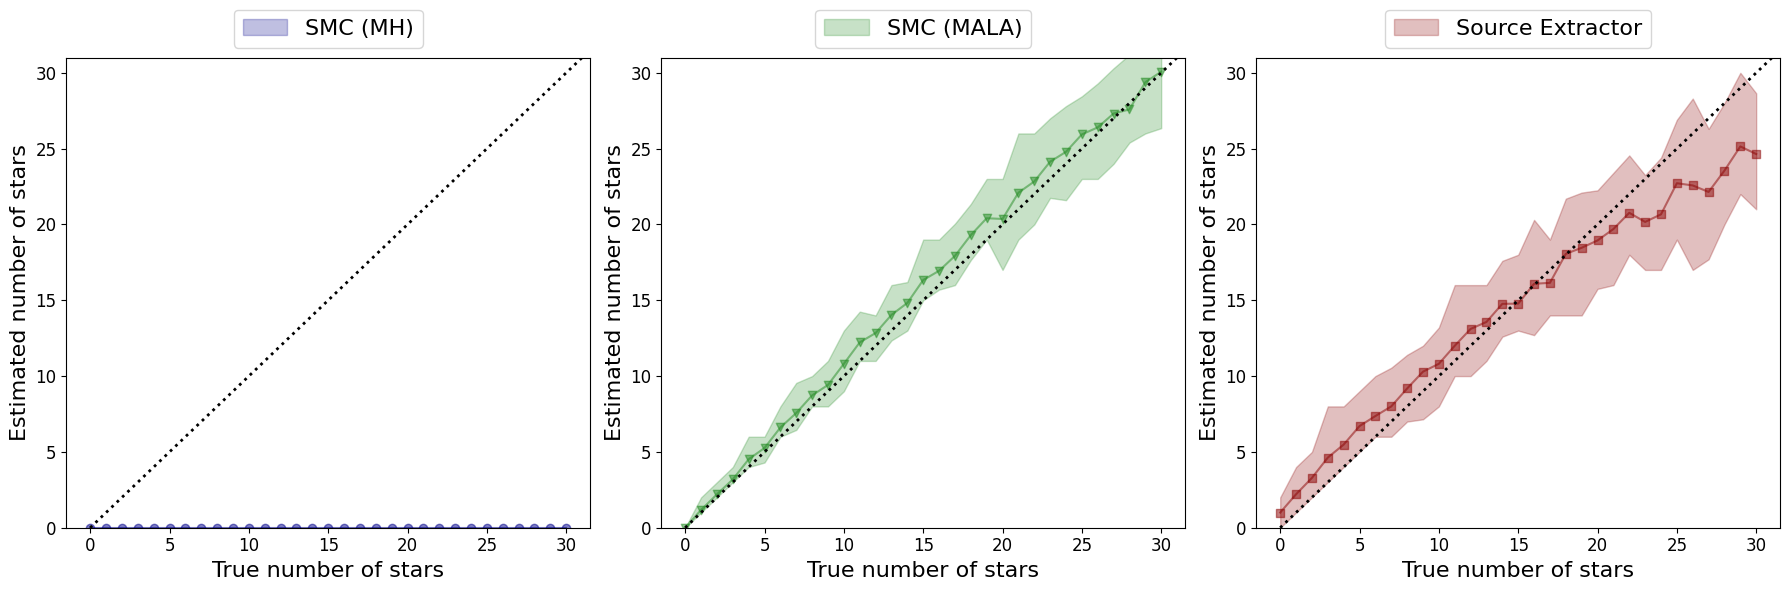

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))
_ = ax[0].plot(torch.arange(num_counts), smcmh_est_count_mean,
               color = smcmh_color, alpha = 0.5)
_ = ax[0].scatter(torch.arange(num_counts), smcmh_est_count_mean,
                  color = smcmh_color, marker = smcmh_marker, alpha = 0.5)
_ = ax[0].fill_between(x = torch.arange(num_counts),
                       y1 = smcmh_est_count_q05, y2 = smcmh_est_count_q95,
                       color = smcmh_color, alpha = 0.25, label = 'SMC (MH)')
_ = ax[0].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[0].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax[0].set_xlabel('True number of stars', fontsize = fontsize)
_ = ax[0].set_ylabel('Estimated number of stars', fontsize = fontsize)
_ = ax[0].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[0].set_ylim((0,num_counts))

_ = ax[1].plot(torch.arange(num_counts), smcmala_est_count_mean,
               color = smcmala_color, alpha = 0.5)
_ = ax[1].scatter(torch.arange(num_counts), smcmala_est_count_mean,
                  color = smcmala_color, marker = smcmala_marker, alpha = 0.5)
_ = ax[1].fill_between(x = torch.arange(num_counts),
                       y1 = smcmala_est_count_q05, y2 = smcmala_est_count_q95,
                       color = smcmala_color, alpha = 0.25, label = 'SMC (MALA)')
_ = ax[1].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[1].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax[1].set_xlabel('True number of stars', fontsize = fontsize)
_ = ax[1].set_ylabel('Estimated number of stars', fontsize = fontsize)
_ = ax[1].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[1].set_ylim((0,num_counts))

_ = ax[2].plot(torch.arange(num_counts), sep_est_count_mean,
               color = sep_color, alpha = 0.5)
_ = ax[2].scatter(torch.arange(num_counts), sep_est_count_mean,
                  color = sep_color, marker = sep_marker, alpha = 0.5)
_ = ax[2].fill_between(x = torch.arange(num_counts),
                       y1 = sep_est_count_q05, y2 = sep_est_count_q95,
                       color = sep_color, alpha = 0.25, label = 'Source Extractor')
_ = ax[2].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[2].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax[2].set_xlabel('True number of stars', fontsize = fontsize)
_ = ax[2].set_ylabel('Estimated number of stars', fontsize = fontsize)
_ = ax[2].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[2].set_ylim((0,num_counts))

fig.tight_layout()

In [18]:
np.random.seed(1)

num_boot_samples = 10000

smcmh_mae_bounds = torch.zeros(num_counts, 2)
smcmala_mae_bounds = torch.zeros(num_counts, 2)
sep_mae_bounds = torch.zeros(num_counts, 2)

for c in range(num_counts):
    orig = (smcmh_counts.mode(-1).values - true_counts)[true_counts == c].abs()
    boot_mae = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_mae[j] = torch.tensor(boot_sample.mean())
    
    smcmh_mae_bounds[c] = boot_mae.quantile(torch.tensor((0.05, 0.95)))

for c in range(num_counts):
    orig = (smcmala_counts.mode(-1).values - true_counts)[true_counts == c].abs()
    boot_mae = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_mae[j] = torch.tensor(boot_sample.mean())
    
    smcmala_mae_bounds[c] = boot_mae.quantile(torch.tensor((0.05, 0.95)))
    
for c in range(num_counts):
    orig = (sep_counts - true_counts)[true_counts == c].abs()
    boot_mae = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_mae[j] = torch.tensor(boot_sample.mean())
    
    sep_mae_bounds[c] = boot_mae.quantile(torch.tensor((0.05, 0.95)))

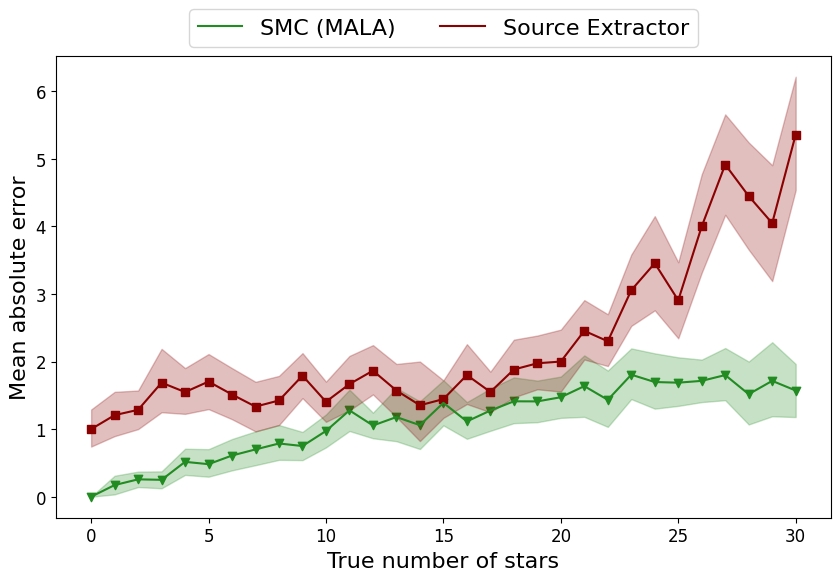

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))

# _ = ax.plot(torch.arange(num_counts), smcmh_count_mae,
#             color = smcmh_color, label = 'SMC (MH)')
# _ = ax.scatter(torch.arange(num_counts), smcmh_count_mae,
#                color = smcmh_color, marker = smcmh_marker)
# _ = ax.fill_between(x = torch.arange(num_counts),
#                     y1 = smcmh_mae_bounds[:,0], y2 = smcmh_mae_bounds[:,1],
#                     color = smcmh_color, alpha = 0.25)

_ = ax.plot(torch.arange(num_counts), smcmala_count_mae,
            color = smcmala_color, label = 'SMC (MALA)')
_ = ax.scatter(torch.arange(num_counts), smcmala_count_mae,
               color = smcmala_color, marker = smcmala_marker)
_ = ax.fill_between(x = torch.arange(num_counts),
                    y1 = smcmala_mae_bounds[:,0], y2 = smcmala_mae_bounds[:,1],
                    color = smcmala_color, alpha = 0.25)

_ = ax.plot(torch.arange(num_counts), sep_count_mae,
            color = sep_color, label = 'Source Extractor')
_ = ax.scatter(torch.arange(num_counts), sep_count_mae,
               color = sep_color, marker = sep_marker)
_ = ax.fill_between(x = torch.arange(num_counts),
                    y1 = sep_mae_bounds[:,0], y2 = sep_mae_bounds[:,1],
                    color = sep_color, alpha = 0.25)

_ = ax.set_xlabel('True number of stars', fontsize = fontsize)
_ = ax.set_ylabel('Mean absolute error', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax.legend(ncol = 3, fancybox = True, loc = "upper center",
              bbox_to_anchor = (0.5,1.125), fontsize = fontsize)

# fig.savefig('figures/divide_and_conquer_count_mae.png', dpi = 250, transparent = True)

In [21]:
np.random.seed(1)

num_boot_samples = 10000

smcmh_accuracy_bounds = torch.zeros(num_counts, 2)
smcmala_accuracy_bounds = torch.zeros(num_counts, 2)
sep_accuracy_bounds = torch.zeros(num_counts, 2)

for c in range(num_counts):
    orig = (smcmh_counts.mode(-1).values == true_counts).float()[true_counts == c]
    boot_accuracy = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_accuracy[j] = torch.tensor(boot_sample.mean())
    
    smcmh_accuracy_bounds[c] = boot_accuracy.quantile(torch.tensor((0.05, 0.95)))

for c in range(num_counts):
    orig = (smcmala_counts.mode(-1).values == true_counts).float()[true_counts == c]
    boot_accuracy = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_accuracy[j] = torch.tensor(boot_sample.mean())
    
    smcmala_accuracy_bounds[c] = boot_accuracy.quantile(torch.tensor((0.05, 0.95)))
    
for c in range(num_counts):
    orig = (sep_counts == true_counts).float()[true_counts == c]
    boot_accuracy = torch.zeros(num_boot_samples)
    
    for j in range(num_boot_samples):
        boot_sample = np.random.choice(orig, size = orig.shape[0], replace = True)
        boot_accuracy[j] = torch.tensor(boot_sample.mean())
    
    sep_accuracy_bounds[c] = boot_accuracy.quantile(torch.tensor((0.05, 0.95)))

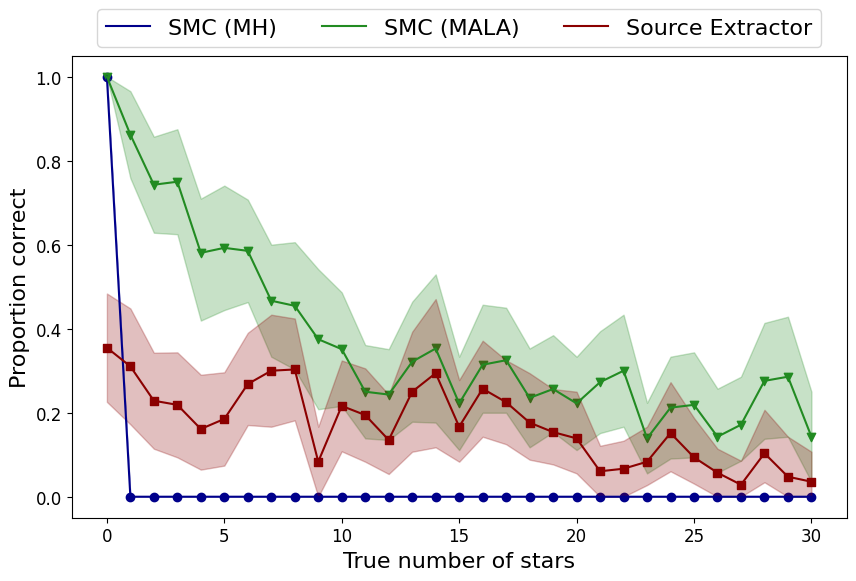

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))

_ = ax.plot(torch.arange(num_counts), smcmh_count_accuracy,
            color = smcmh_color, label = 'SMC (MH)')
_ = ax.scatter(torch.arange(num_counts), smcmh_count_accuracy,
               color = smcmh_color, marker = smcmh_marker)
_ = ax.fill_between(x = torch.arange(num_counts),
                    y1 = smcmh_accuracy_bounds[:,0], y2 = smcmh_accuracy_bounds[:,1],
                    color = smcmh_color, alpha = 0.25)

_ = ax.plot(torch.arange(num_counts), smcmala_count_accuracy,
            color = smcmala_color, label = 'SMC (MALA)')
_ = ax.scatter(torch.arange(num_counts), smcmala_count_accuracy,
               color = smcmala_color, marker = smcmala_marker)
_ = ax.fill_between(x = torch.arange(num_counts),
                    y1 = smcmala_accuracy_bounds[:,0], y2 = smcmala_accuracy_bounds[:,1],
                    color = smcmala_color, alpha = 0.25)

_ = ax.plot(torch.arange(num_counts), sep_count_accuracy,
            color = sep_color, label = 'Source Extractor')
_ = ax.scatter(torch.arange(num_counts), sep_count_accuracy,
               color = sep_color, marker = sep_marker)
_ = ax.fill_between(x = torch.arange(num_counts),
                    y1 = sep_accuracy_bounds[:,0], y2 = sep_accuracy_bounds[:,1],
                    color = sep_color, alpha = 0.25)

_ = ax.legend(ncol = 3, fancybox = True, loc = "upper center",
              bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax.set_xlabel('True number of stars', fontsize = fontsize)
_ = ax.set_ylabel('Proportion correct', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)

# fig.savefig('figures/divide_and_conquer_count_accuracy.png', dpi = 250, transparent = True)

### Plots: Total flux

/tmp/ipykernel_2619303/3734248564.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  _ = ax[0].set_yscale('log')


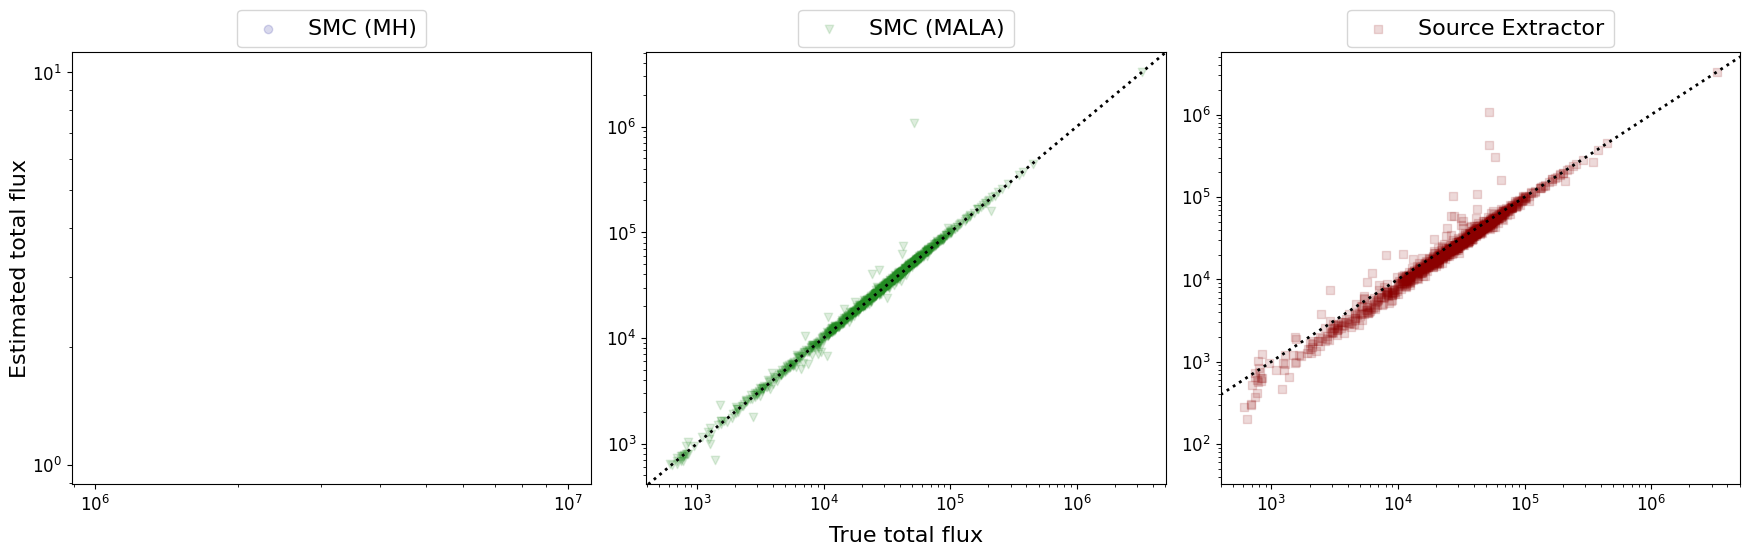

In [71]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

_ = ax[0].scatter(x = true_fluxes.sum(-1), y = smcmh_fluxes.sum(-1).median(-1).values,
                  color = smcmh_color, marker = smcmh_marker, alpha = 0.15, label = 'SMC (MH)')
_ = ax[0].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[0].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5, 1.125), fontsize = fontsize)
_ = ax[0].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[0].set_xscale('log')
_ = ax[0].set_yscale('log')

_ = ax[1].scatter(x = true_fluxes.sum(-1), y = smcmala_fluxes.sum(-1).median(-1).values,
                  color = smcmala_color, marker = smcmala_marker, alpha = 0.15, label = 'SMC (MALA)')
_ = ax[1].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[1].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5, 1.125), fontsize = fontsize)
_ = ax[1].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[1].set_xscale('log')
_ = ax[1].set_yscale('log')

_ = ax[2].scatter(x = true_fluxes.sum(-1), y = sep_fluxes.sum(-1),
                  color = sep_color, marker = sep_marker, alpha = 0.15, label = "Source Extractor")
_ = ax[2].axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 2)
_ = ax[2].legend(fancybox = True, loc = "upper center",
                 bbox_to_anchor = (0.5, 1.125), fontsize = fontsize)
_ = ax[2].tick_params(axis = "both", labelsize = 0.75 * fontsize)
_ = ax[2].set_xscale('log')
_ = ax[2].set_yscale('log')

_ = labels = fig.add_subplot(111, frameon = False)
_ = labels.set_xlabel('True total flux', labelpad = 30, fontsize = fontsize)
_ = labels.set_ylabel('Estimated total flux', labelpad = 30, fontsize = fontsize)
_ = labels.set_xticks([])
_ = labels.set_yticks([])

fig.tight_layout()

# fig.savefig('figures/divide_and_conquer_totalflux.png', dpi = 250, transparent = True)

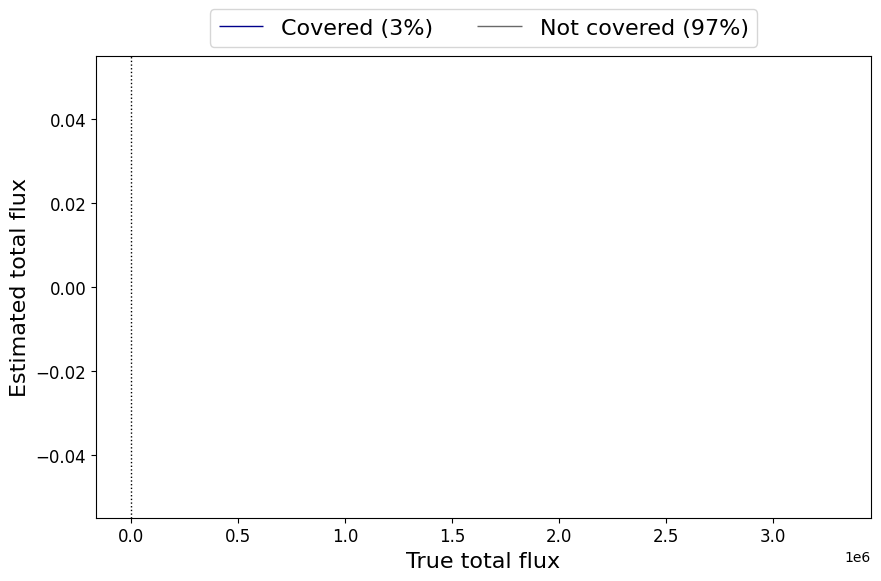

In [ ]:
interval = 0.90
q05 = smcmh_fluxes.sum(-1).quantile(0.5 - interval / 2, dim = -1)
q95 = smcmh_fluxes.sum(-1).quantile(0.5 + interval / 2, dim = -1)
covered = torch.logical_and(q05 <= true_fluxes.sum(-1),
                            q95 >= true_fluxes.sum(-1))

fig, ax = plt.subplots(1, 1, figsize = (10,6))

_ = ax.vlines(x = true_fluxes.sum(-1)[covered],
              ymin = q05[covered], ymax = q95[covered],
              color = smcmh_color, alpha = 1, linewidth = 1,
              label = f'Covered ({(covered.float().mean() * 100).round().int()}%)')
_ = ax.vlines(x = true_fluxes.sum(-1)[~covered],
              ymin = q05[~covered], ymax = q95[~covered],
              color = 'dimgray', alpha = 1, linewidth = 1,
              label = f'Not covered ({((~covered).float().mean() * 100).round().int()}%)')
_ = ax.axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 1)
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')

_ = ax.legend(ncol = 2, fancybox = True, loc = "upper center",
              bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax.set_xlabel('True total flux', fontsize = fontsize)
_ = ax.set_ylabel('Estimated total flux', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)

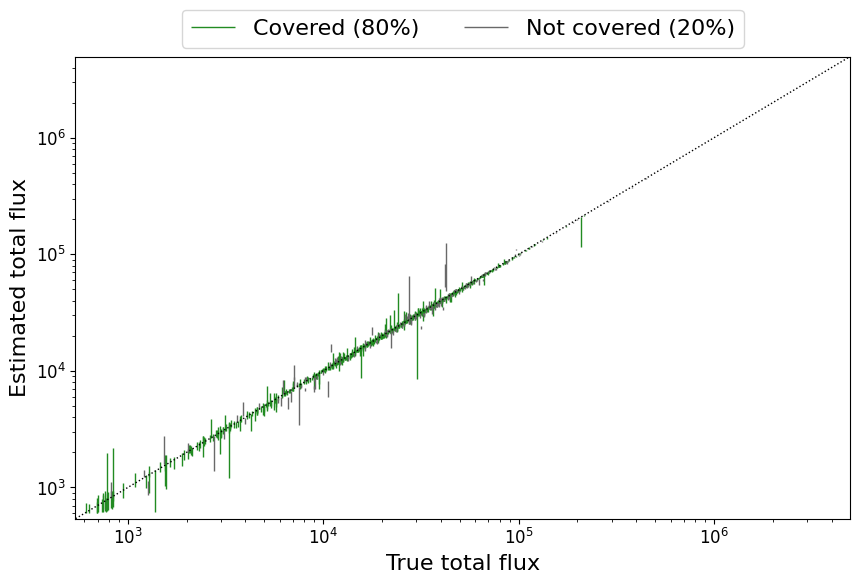

In [70]:
interval = 0.90
q05 = smcmala_fluxes.sum(-1).quantile(0.5 - interval / 2, dim = -1)
q95 = smcmala_fluxes.sum(-1).quantile(0.5 + interval / 2, dim = -1)
covered = torch.logical_and(q05 <= true_fluxes.sum(-1),
                            q95 >= true_fluxes.sum(-1))

fig, ax = plt.subplots(1, 1, figsize = (10,6))

_ = ax.vlines(x = true_fluxes.sum(-1)[covered],
              ymin = q05[covered], ymax = q95[covered],
              color = smcmala_color, alpha = 1, linewidth = 1,
              label = f'Covered ({(covered.float().mean() * 100).round().int()}%)')
_ = ax.vlines(x = true_fluxes.sum(-1)[~covered],
              ymin = q05[~covered], ymax = q95[~covered],
              color = 'dimgray', alpha = 1, linewidth = 1,
              label = f'Not covered ({((~covered).float().mean() * 100).round().int()}%)')
_ = ax.axline((0,0), slope = 1, color = 'black', linestyle = ':', linewidth = 1)
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')

_ = ax.legend(ncol = 2, fancybox = True, loc = "upper center",
              bbox_to_anchor = (0.5,1.125), fontsize = fontsize)
_ = ax.set_xlabel('True total flux', fontsize = fontsize)
_ = ax.set_ylabel('Estimated total flux', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)

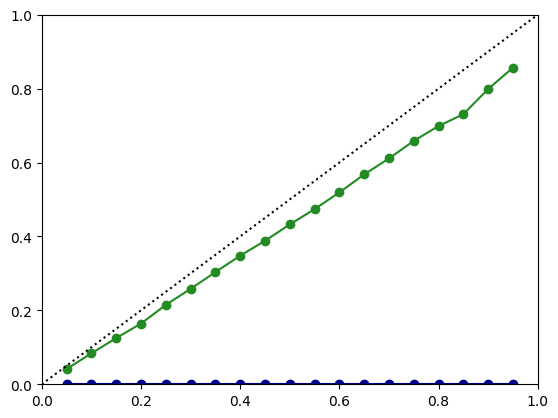

In [26]:
intervals = [c*0.05 for c in range(1,20)]
mh_coverage_rate = []
mala_coverage_rate = []

for i in intervals:
    qlow = smcmh_fluxes[true_counts>0].sum(-1).quantile(0.5 - i / 2, dim = -1)
    qhigh = smcmh_fluxes[true_counts>0].sum(-1).quantile(0.5 + i / 2, dim = -1)
    covered = torch.logical_and(qlow <= true_fluxes[true_counts>0].sum(-1),
                                qhigh >= true_fluxes[true_counts>0].sum(-1))
    
    mh_coverage_rate.append(covered.float().mean())
    
    qlow = smcmala_fluxes[true_counts>0].sum(-1).quantile(0.5 - i / 2, dim = -1)
    qhigh = smcmala_fluxes[true_counts>0].sum(-1).quantile(0.5 + i / 2, dim = -1)
    covered = torch.logical_and(qlow <= true_fluxes[true_counts>0].sum(-1),
                                qhigh >= true_fluxes[true_counts>0].sum(-1))
    
    mala_coverage_rate.append(covered.float().mean())
    

_ = plt.plot(intervals, mh_coverage_rate, color = smcmh_color)
_ = plt.scatter(intervals, mh_coverage_rate, color = smcmh_color)
_ = plt.plot(intervals, mala_coverage_rate, color = smcmala_color)
_ = plt.scatter(intervals, mala_coverage_rate, color = smcmala_color)
_ = plt.axline((0,0), slope = 1, linestyle = ':', color = 'black')
_ = plt.xlim((0,1))
_ = plt.ylim((0,1))

### Plots: Runtime and number of iterations

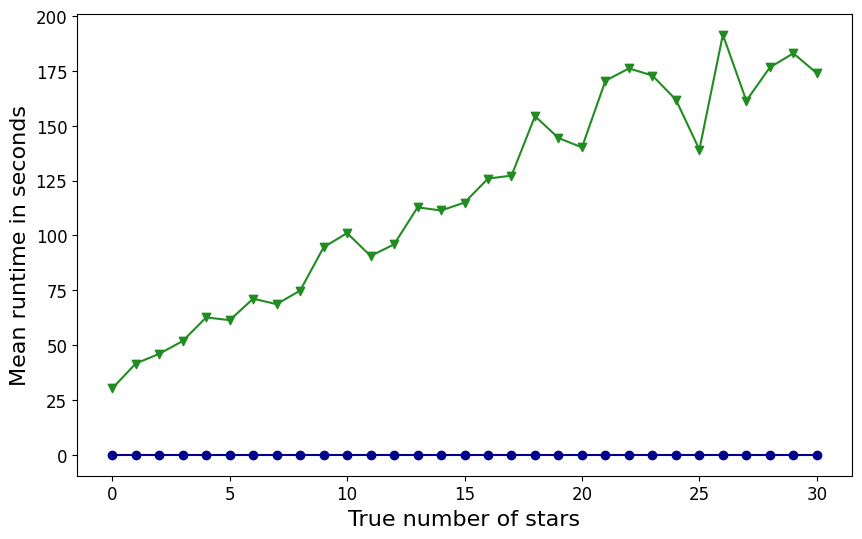

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))

_ = ax.plot(torch.arange(num_counts), smcmh_runtime_mean, color = smcmh_color)
_ = ax.scatter(torch.arange(num_counts), smcmh_runtime_mean,
               color = smcmh_color, marker = smcmh_marker)

_ = ax.plot(torch.arange(num_counts), smcmala_runtime_mean, color = smcmala_color)
_ = ax.scatter(torch.arange(num_counts), smcmala_runtime_mean,
               color = smcmala_color, marker = smcmala_marker)

_ = ax.set_xlabel('True number of stars', fontsize = fontsize)
_ = ax.set_ylabel('Mean runtime in seconds', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)

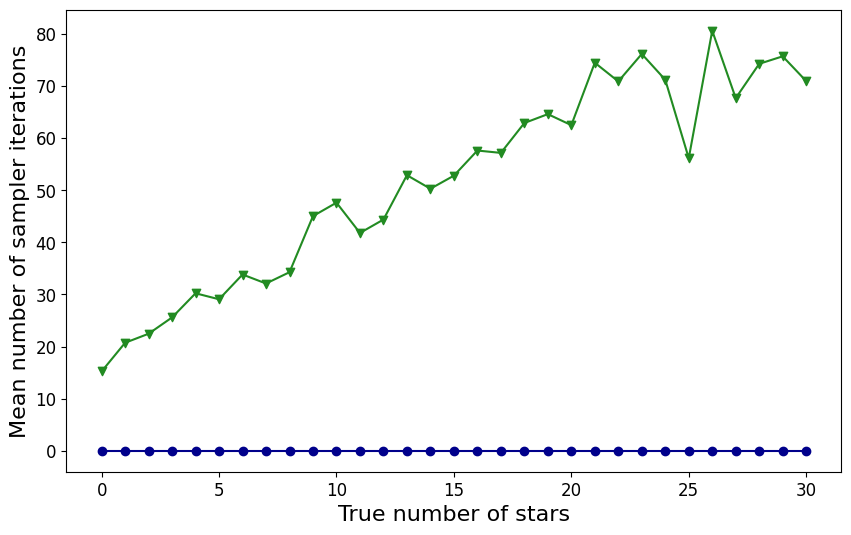

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))

_ = ax.plot(torch.arange(num_counts), smcmh_num_iters_mean, color = smcmh_color)
_ = ax.scatter(torch.arange(num_counts), smcmh_num_iters_mean,
               color = smcmh_color, marker = smcmh_marker)

_ = ax.plot(torch.arange(num_counts), smcmala_num_iters_mean, color = smcmala_color)
_ = ax.scatter(torch.arange(num_counts), smcmala_num_iters_mean,
               color = smcmala_color, marker = smcmala_marker)

_ = ax.set_xlabel('True number of stars', fontsize = fontsize)
_ = ax.set_ylabel('Mean number of sampler iterations', fontsize = fontsize)
_ = ax.tick_params(axis = "both", labelsize = 0.75 * fontsize)

### Plots: Reconstructed images

In [29]:
import sys
sys.path.append('../../..')
from smc.images import ImageModel

imagemodel = ImageModel(image_height = images.shape[1],
                        image_width = images.shape[2],
                        psf_stdev = 1.0,
                        background = 300)

In [ ]:
def plot_detections(image_index, smcmala_catalog_index):
    fig, ax = plt.subplots(1, 3, figsize = (15,5), layout = 'compressed')

    orig = ax[0].imshow(images[image_index], cmap = cmap)
    _ = ax[0].scatter(true_locs[image_index, :true_counts[image_index].item(), 1] - 0.5,
                    true_locs[image_index, :true_counts[image_index].item(), 0] - 0.5,
                    color = 'gold', edgecolors = 'black', marker = '*', s = 250)
    _ = ax[0].set_xticks([])
    _ = ax[0].set_yticks([])

    smcmala_psf = imagemodel.psf(smcmala_locs[image_index,smcmala_catalog_index,:].view(1,1,1,-1,2))
    smcmala_rate = (smcmala_psf * smcmala_fluxes[image_index,smcmala_catalog_index,:].view(1,1,1,1,1,-1)).sum(-1) + imagemodel.background
    smcmala_reconstruction = smcmala_rate.squeeze([0,1]).permute((2,0,1)).squeeze()
    smcmala_recon = ax[1].imshow(smcmala_reconstruction, cmap = cmap)
    _ = ax[1].scatter(smcmala_locs[image_index, smcmala_catalog_index, :smcmala_counts[image_index, smcmala_catalog_index].int().item(), 1] - 0.5,
                      smcmala_locs[image_index, smcmala_catalog_index, :smcmala_counts[image_index, smcmala_catalog_index].int().item(), 0] - 0.5,
                      color = 'dodgerblue', edgecolors = 'black', marker = '*', s = 250)
    _ = ax[1].set_xticks([])
    _ = ax[1].set_yticks([])

    sep_psf = imagemodel.psf(sep_locs[image_index, :].view(1,1,1,-1,2))
    sep_rate = (sep_psf * sep_fluxes[image_index,:].view(1,1,1,1,1,-1)).sum(-1) + imagemodel.background
    sep_reconstruction = sep_rate.squeeze([0,1]).permute((2,0,1)).squeeze()
    sep_recon = ax[2].imshow(sep_reconstruction, cmap = cmap)
    _ = ax[2].scatter(sep_locs[image_index, :sep_counts[image_index].int().item(), 1] - 0.5,
                      sep_locs[image_index, :sep_counts[image_index].int().item(), 0] - 0.5,
                      color = 'red', edgecolors = 'black', marker = '*', s = 250)
    _ = ax[2].set_xticks([])
    _ = ax[2].set_yticks([])
    
    return fig

In [31]:
np.random.seed(1)

image_indexes = torch.zeros(num_counts, 2)

for c in range(num_counts):
    image_indexes[c] = torch.tensor(np.random.choice((true_counts == c).nonzero().squeeze(),
                                                     size = 2, replace = False))

image_indexes = image_indexes.int()

/tmp/ipykernel_2619303/745018246.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, figsize = (15,5), layout = 'compressed')


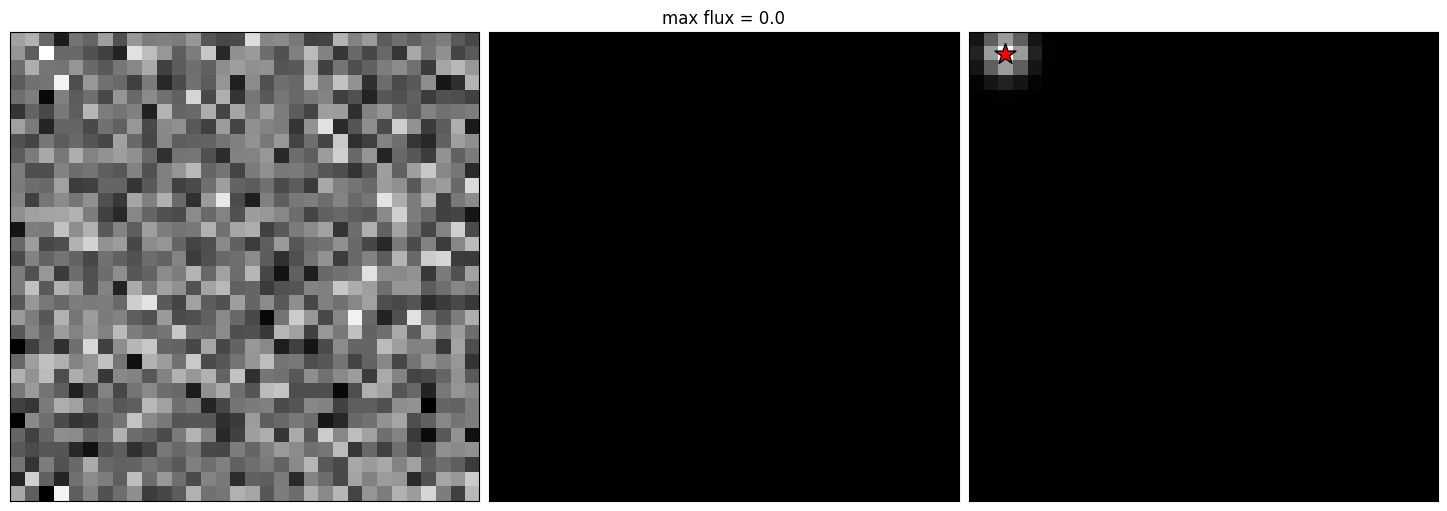

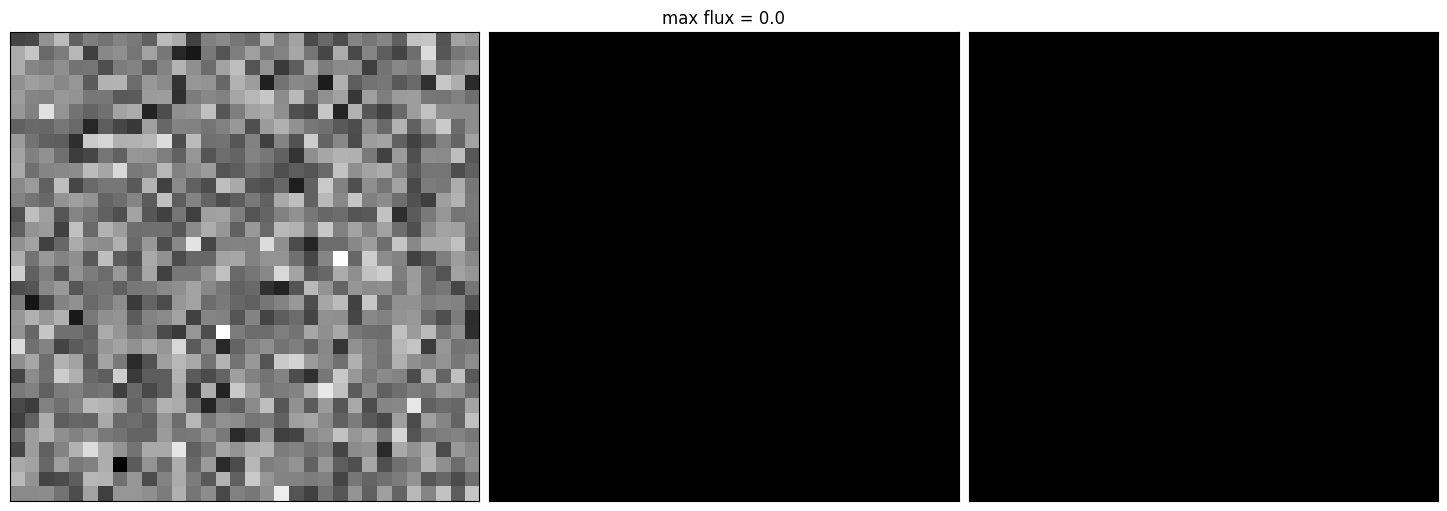

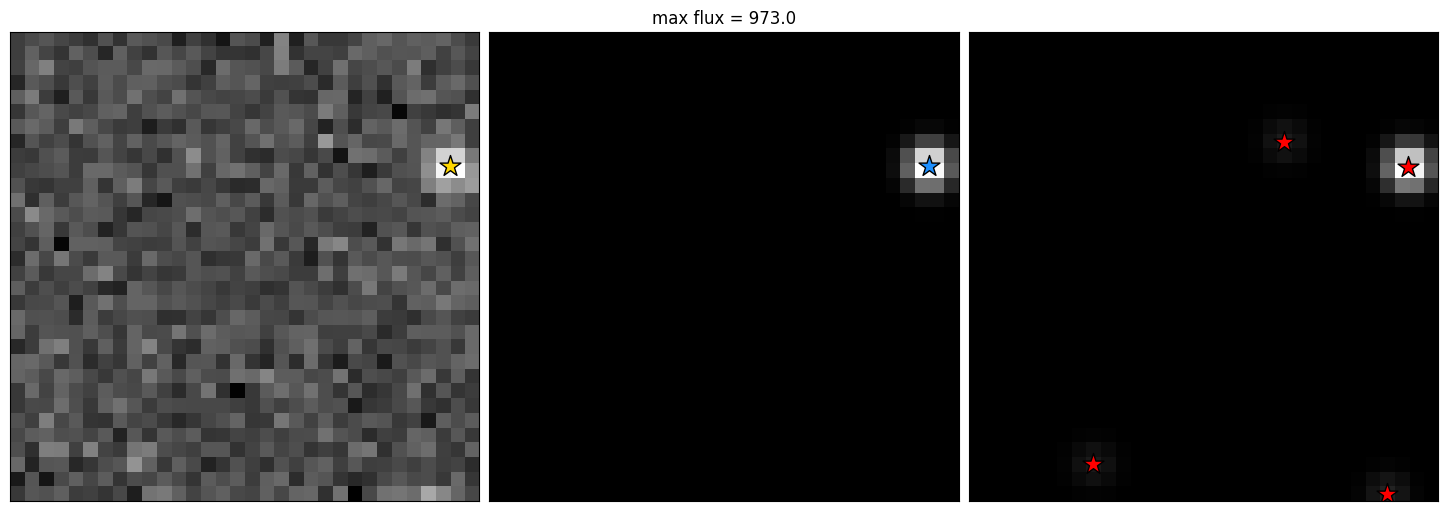

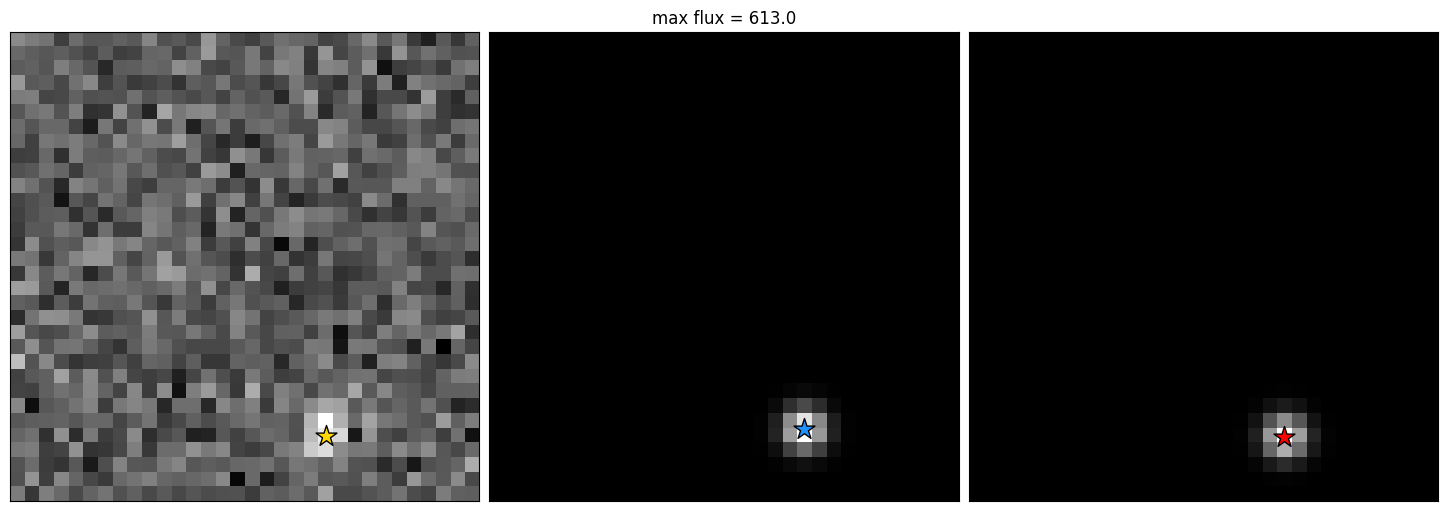

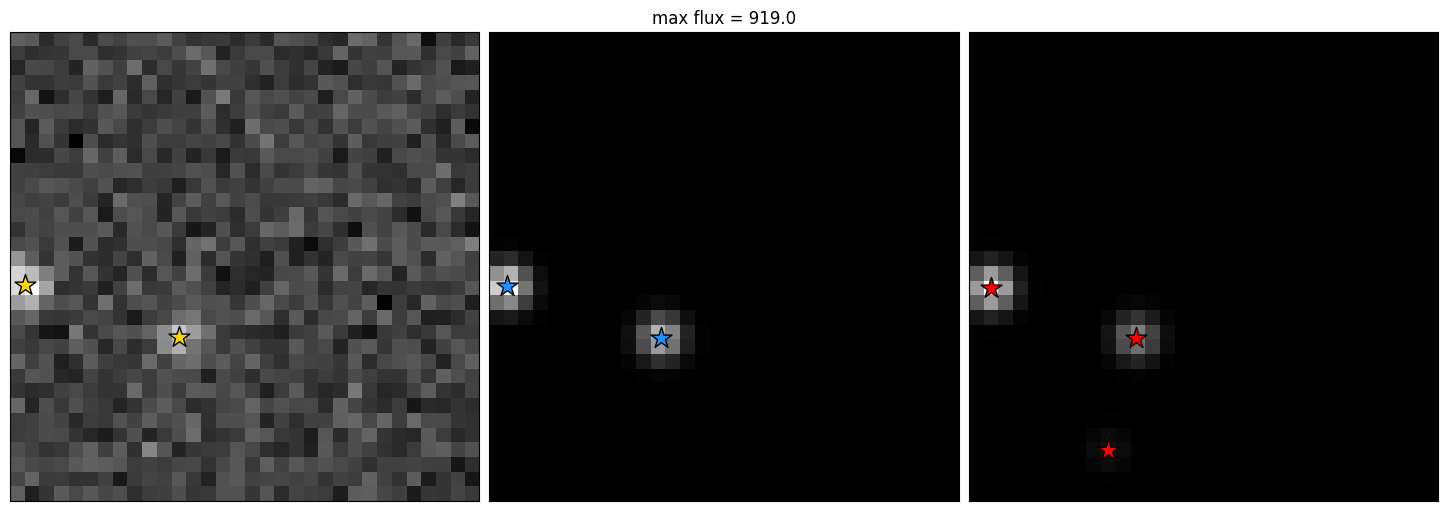

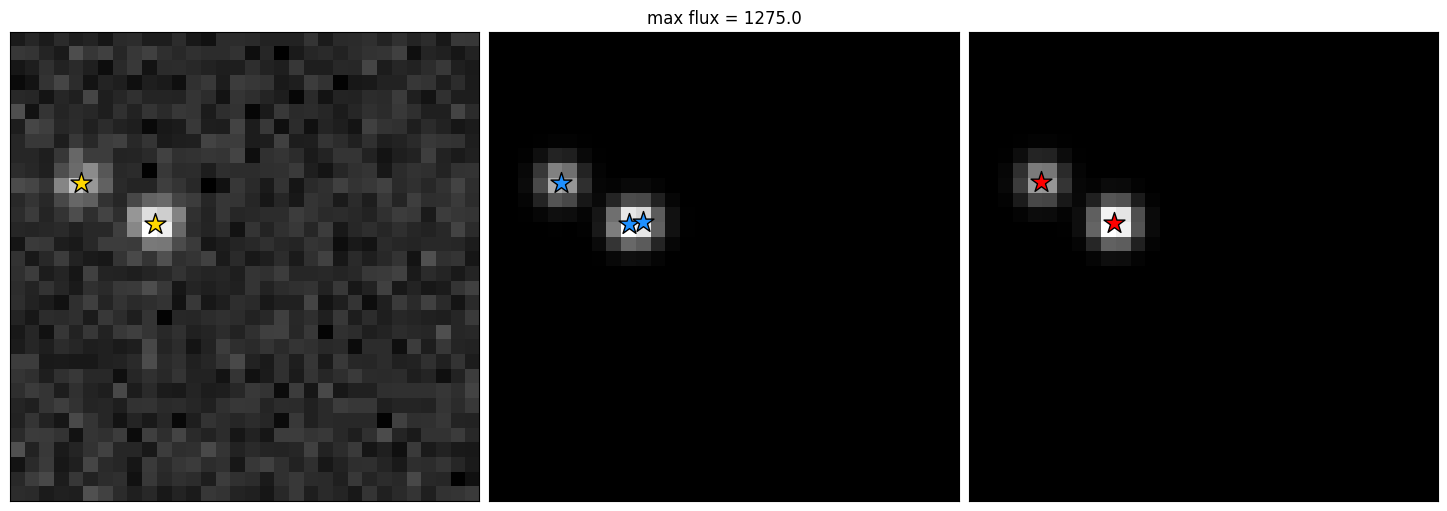

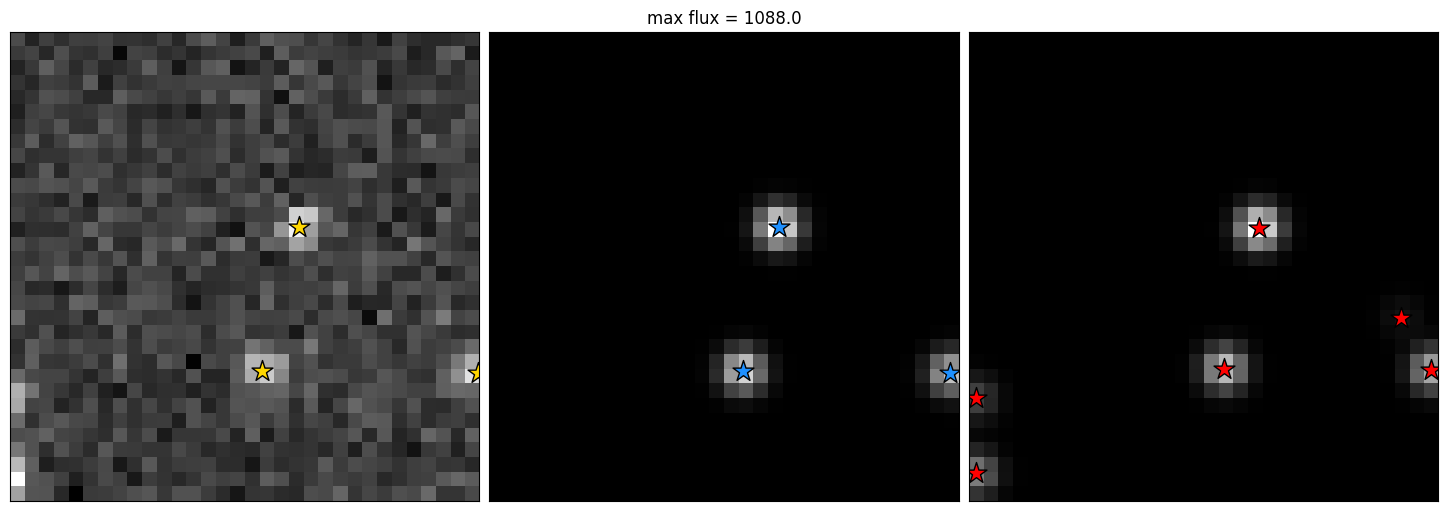

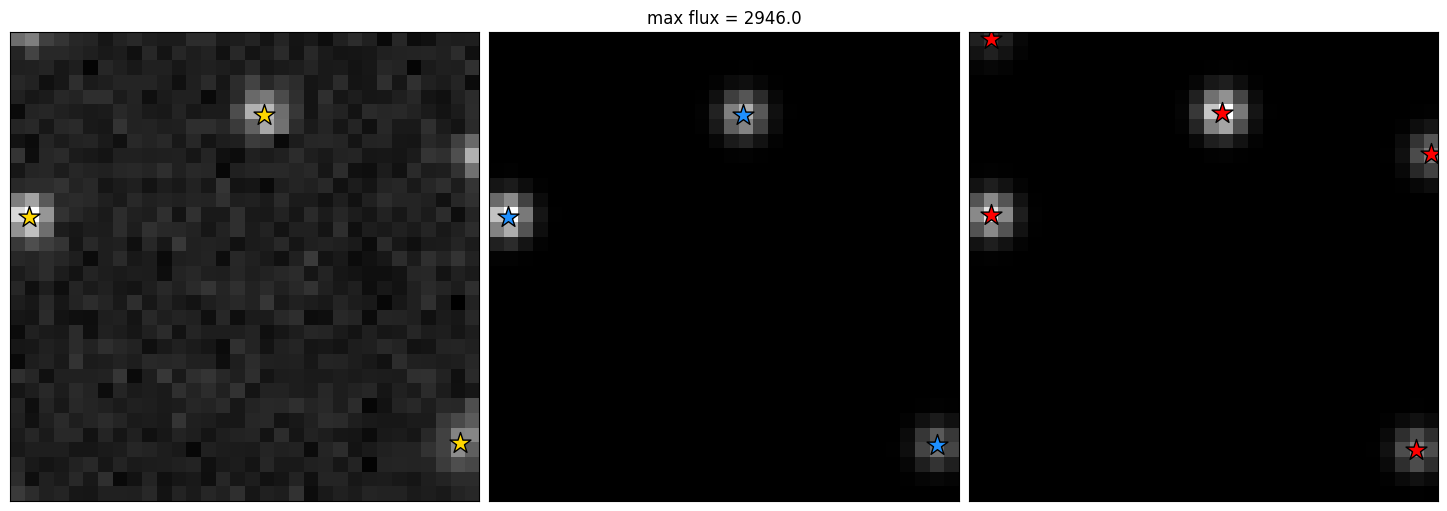

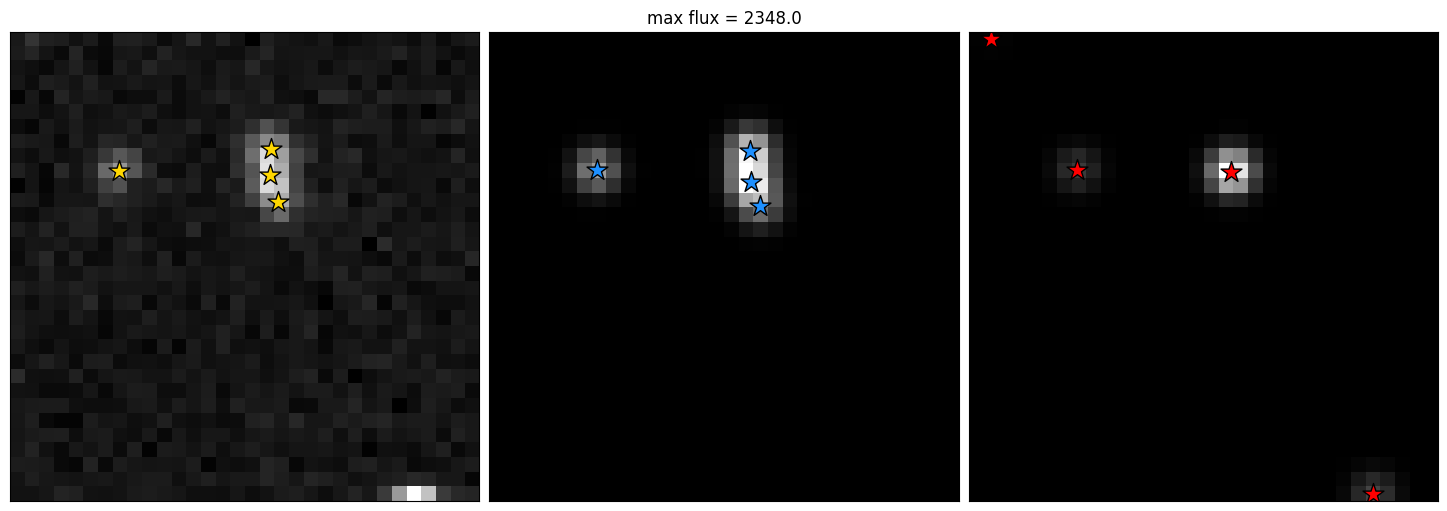

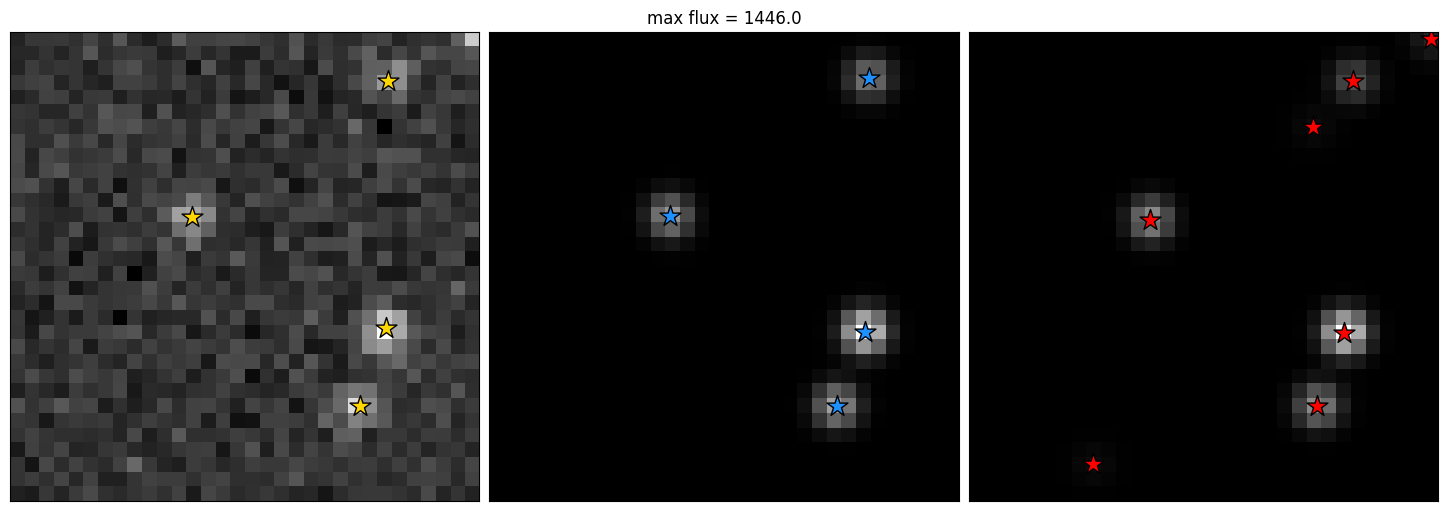

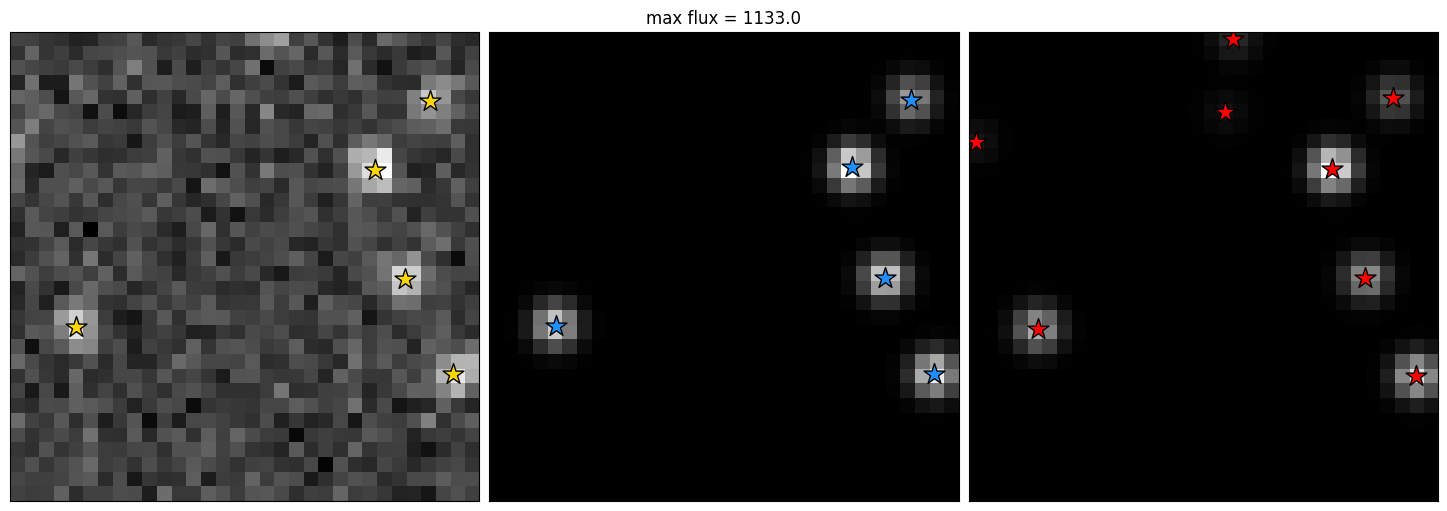

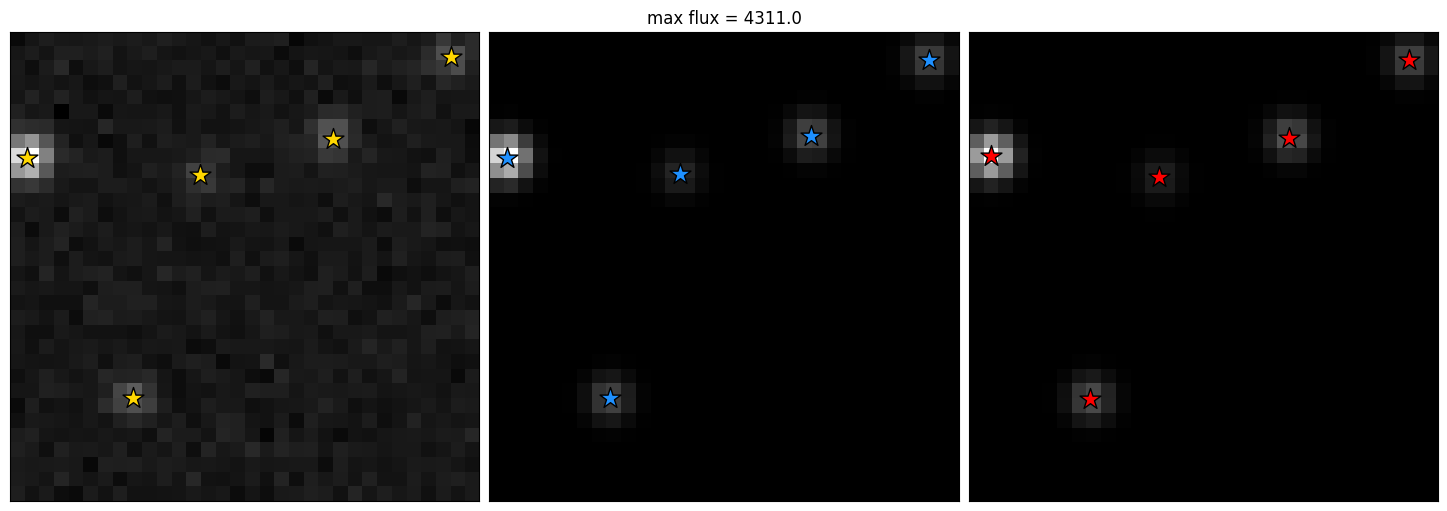

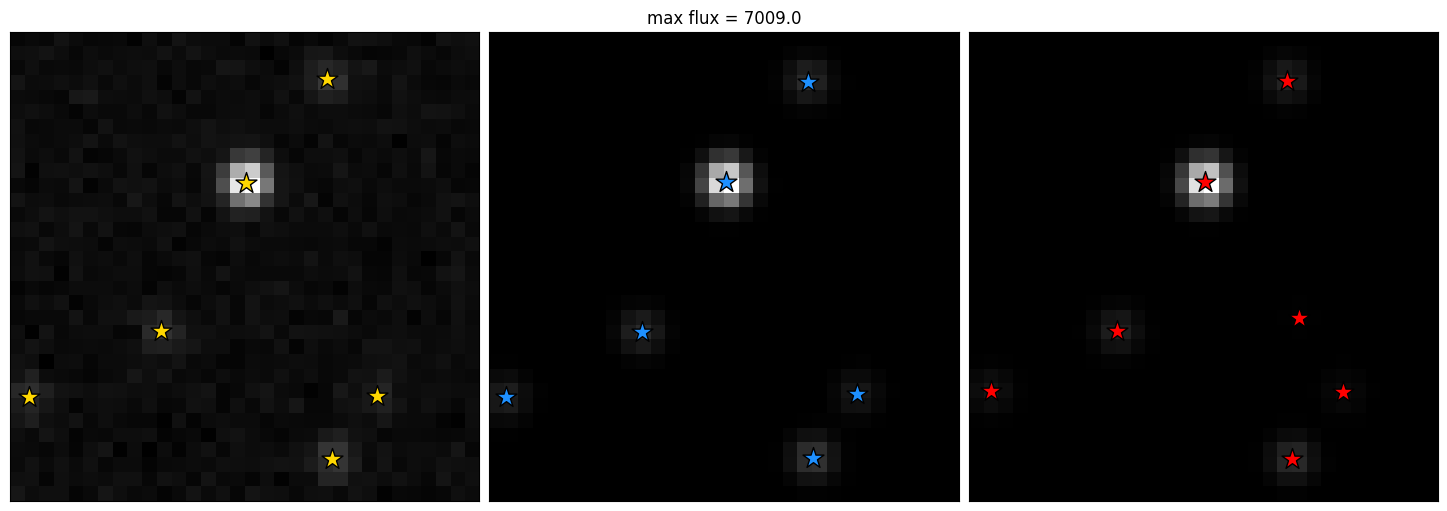

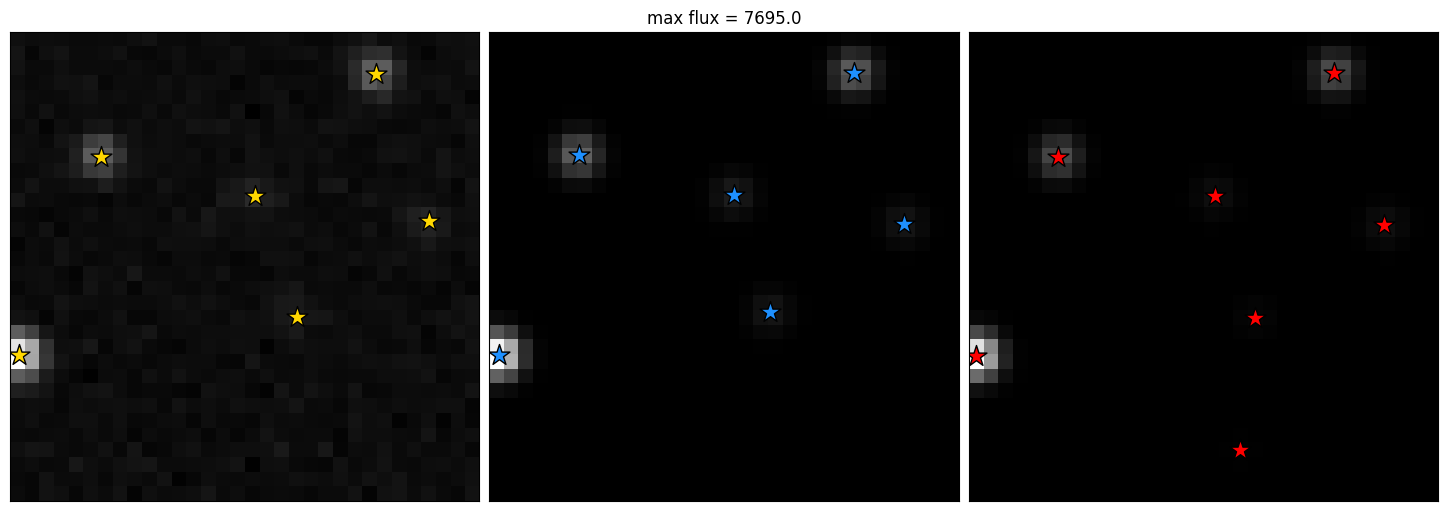

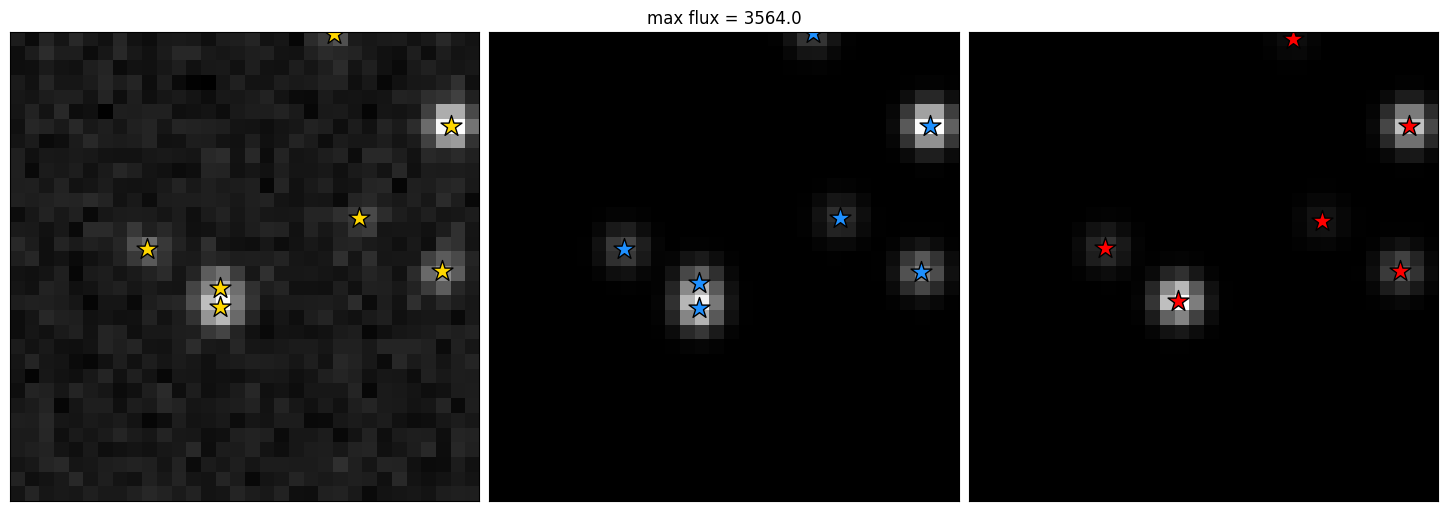

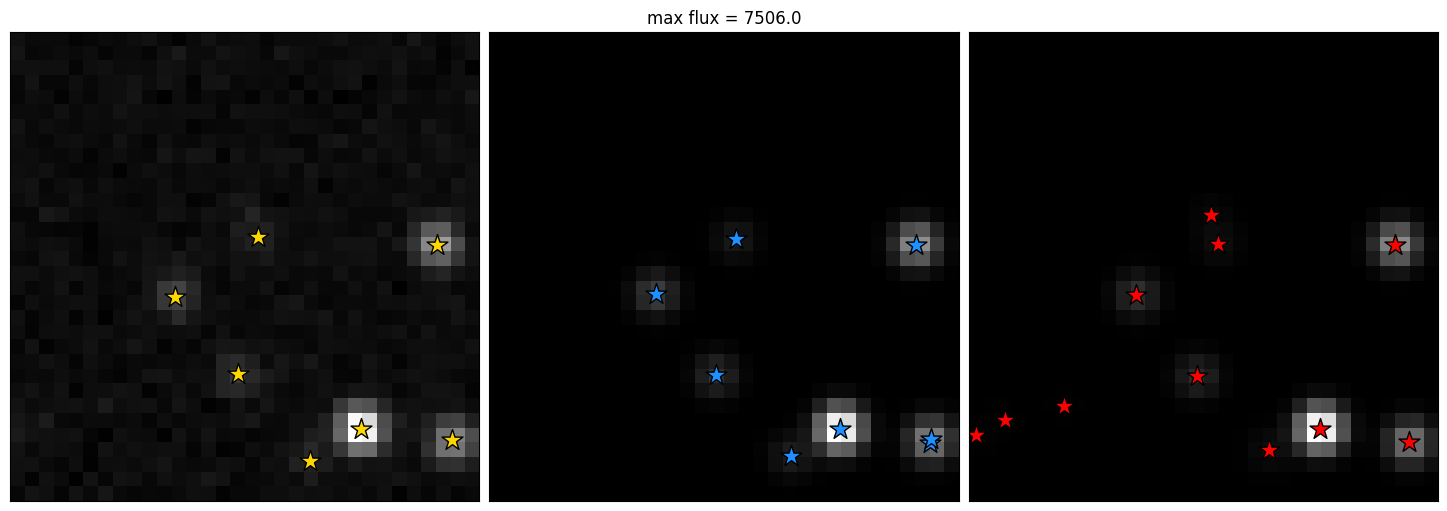

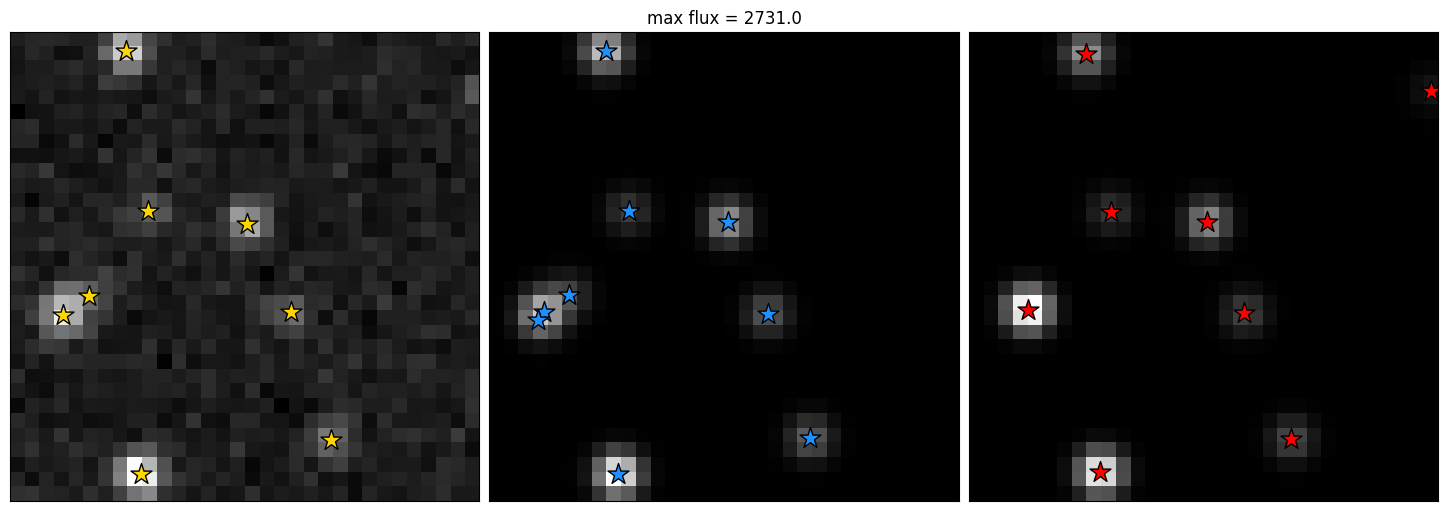

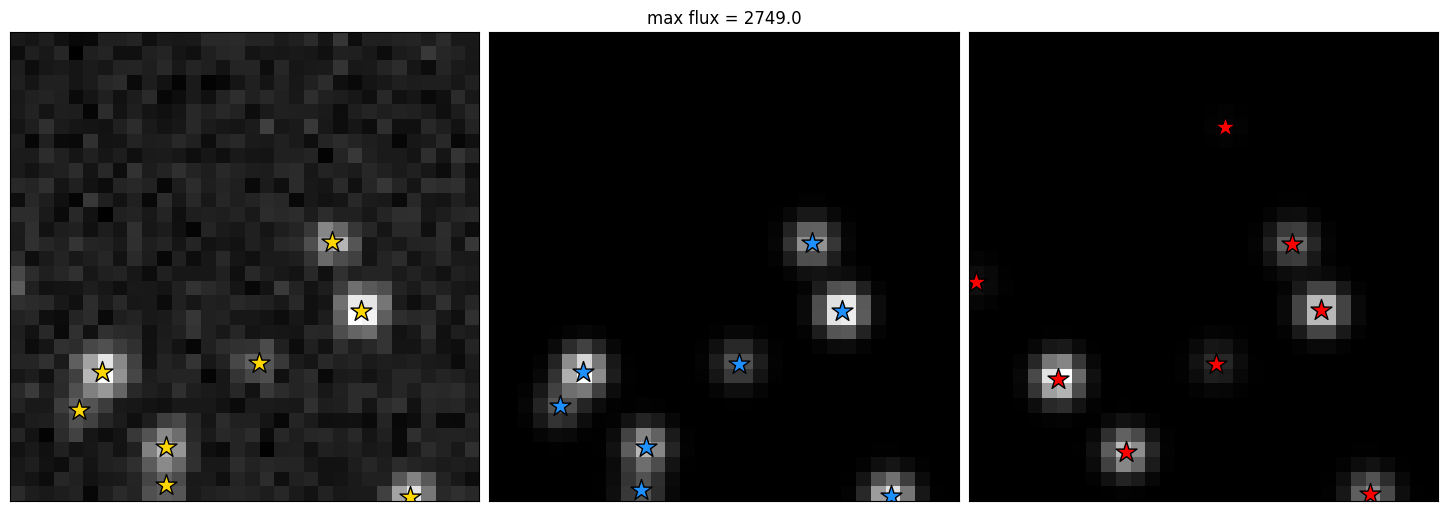

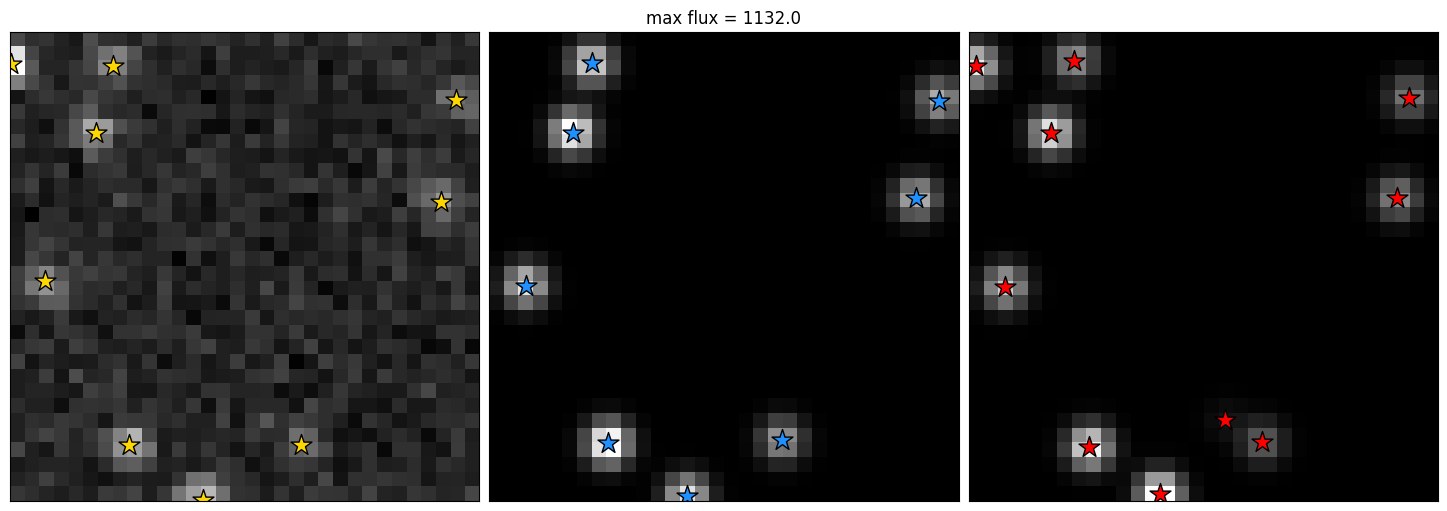

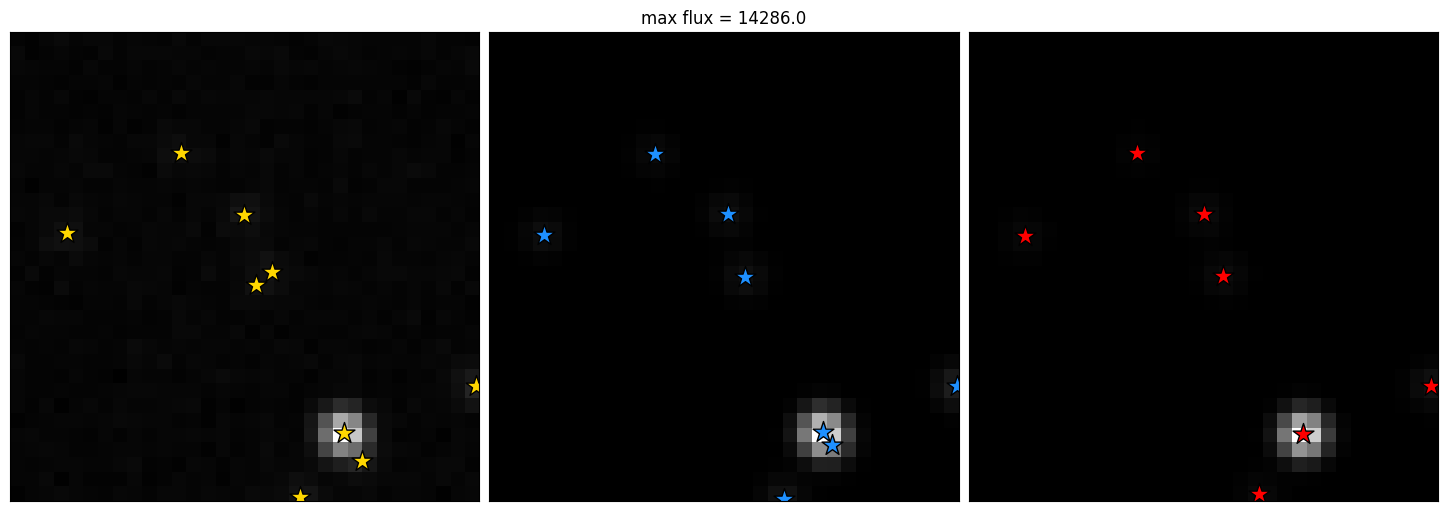

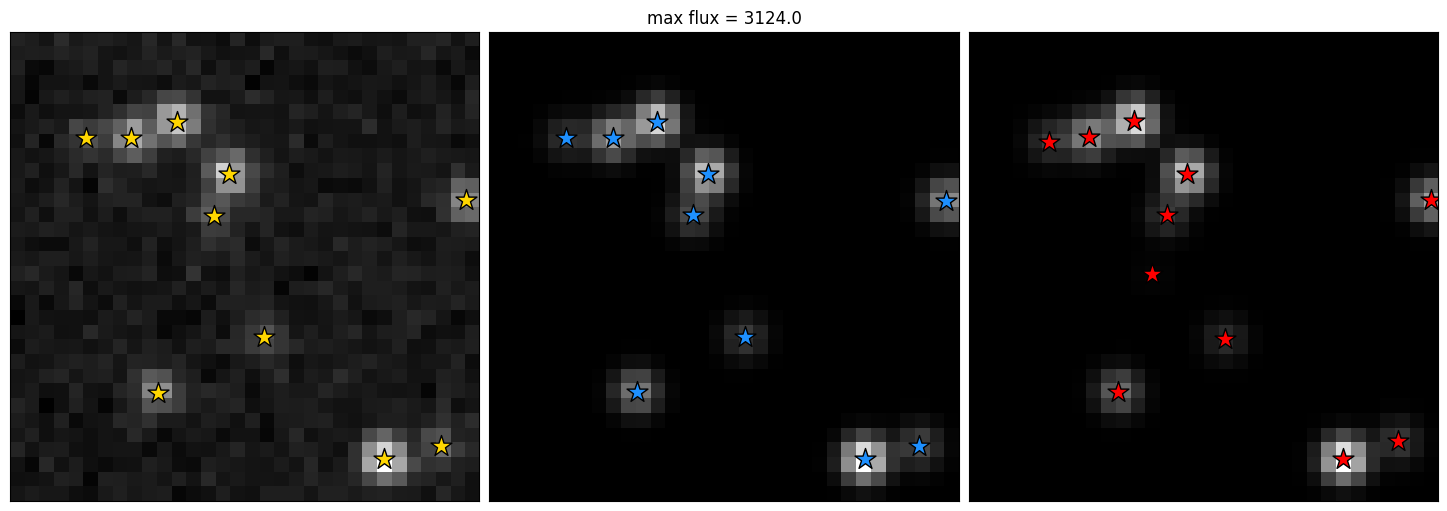

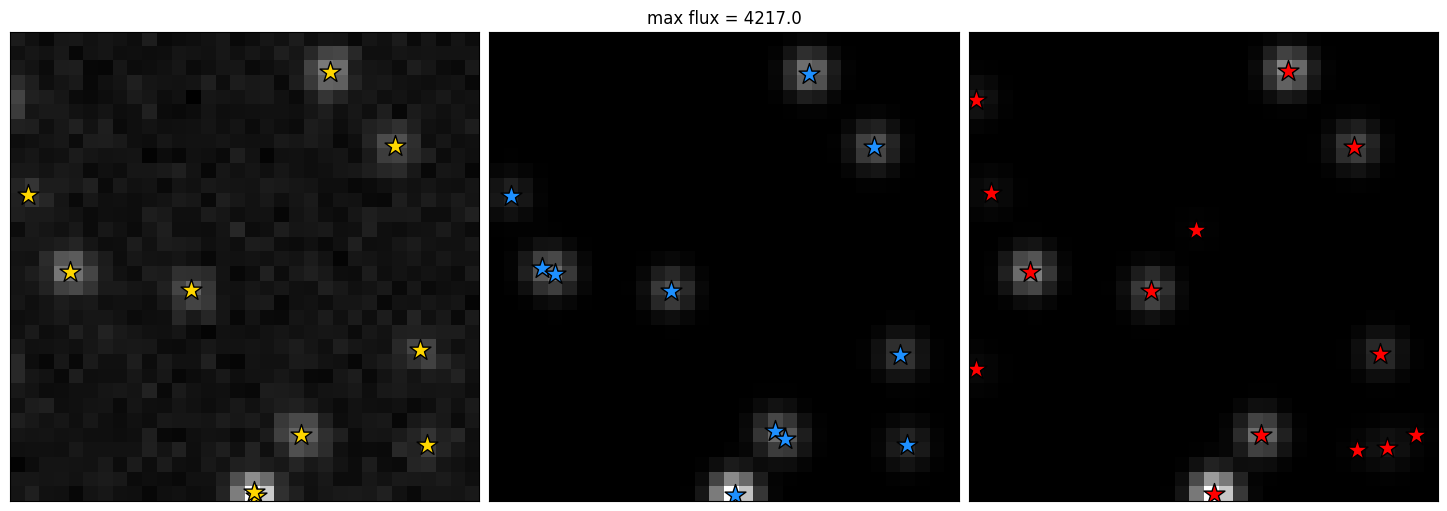

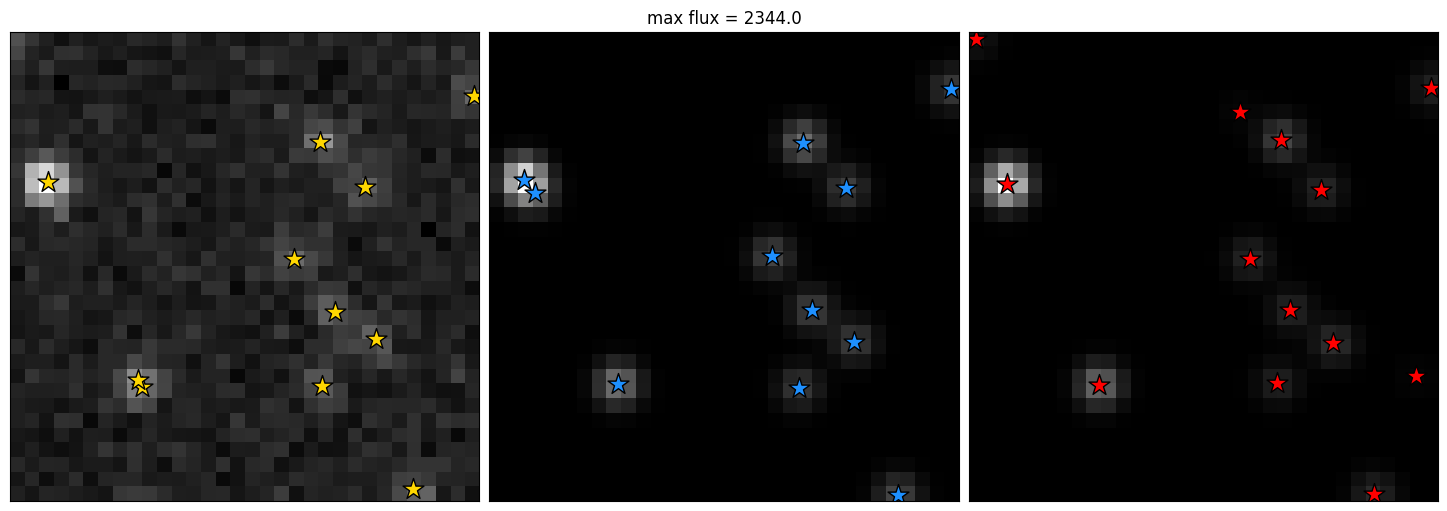

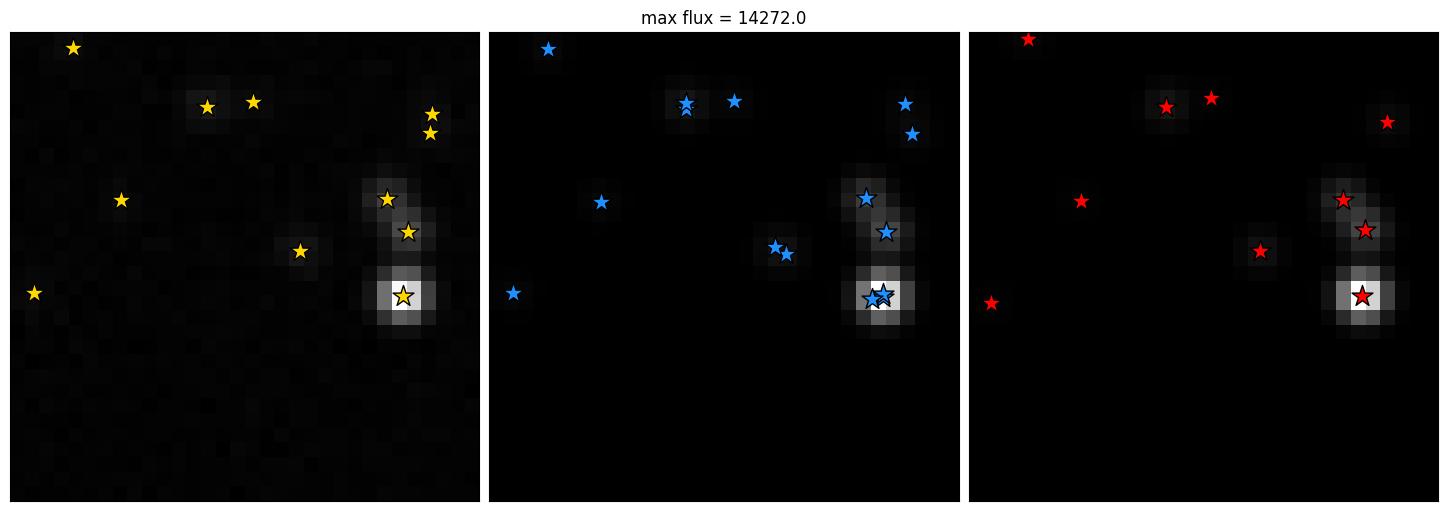

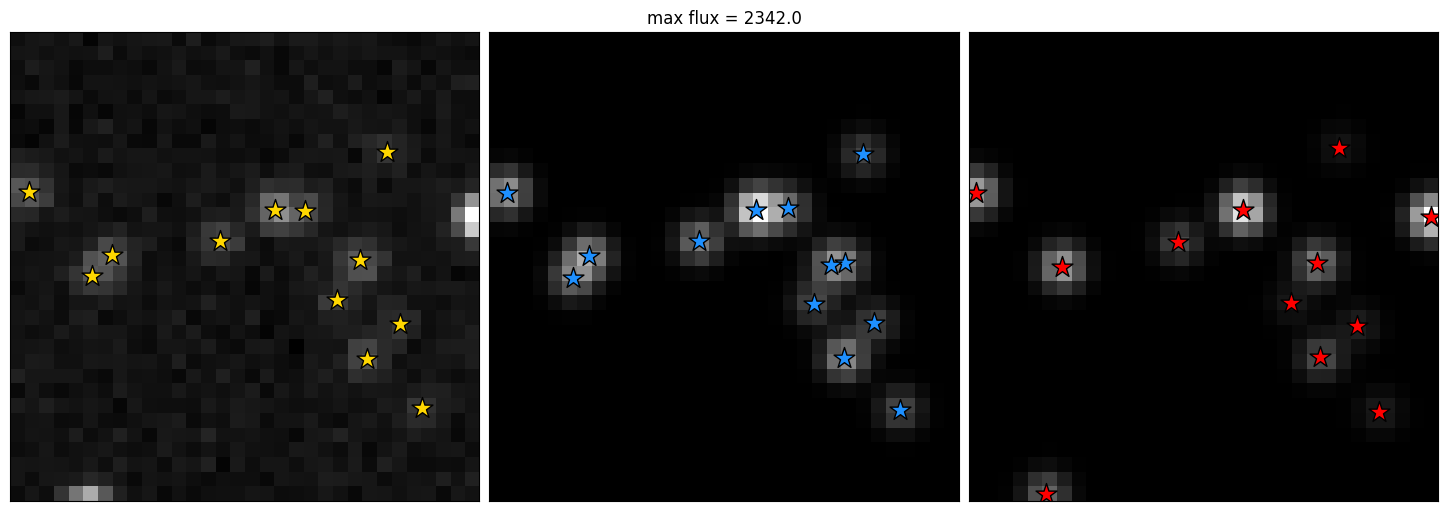

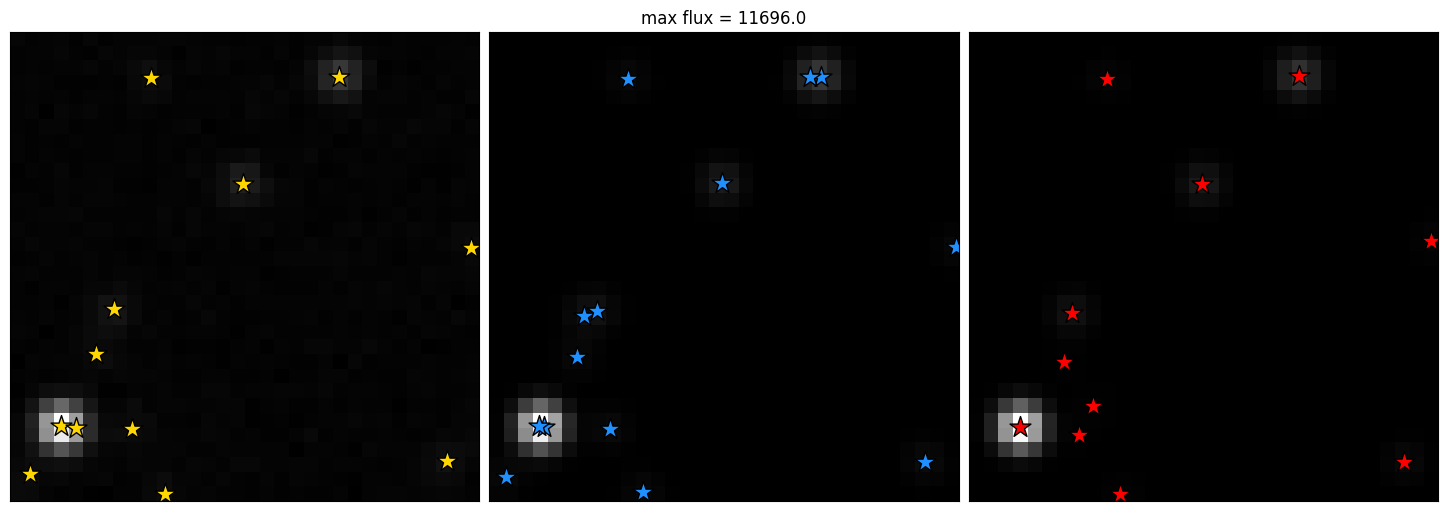

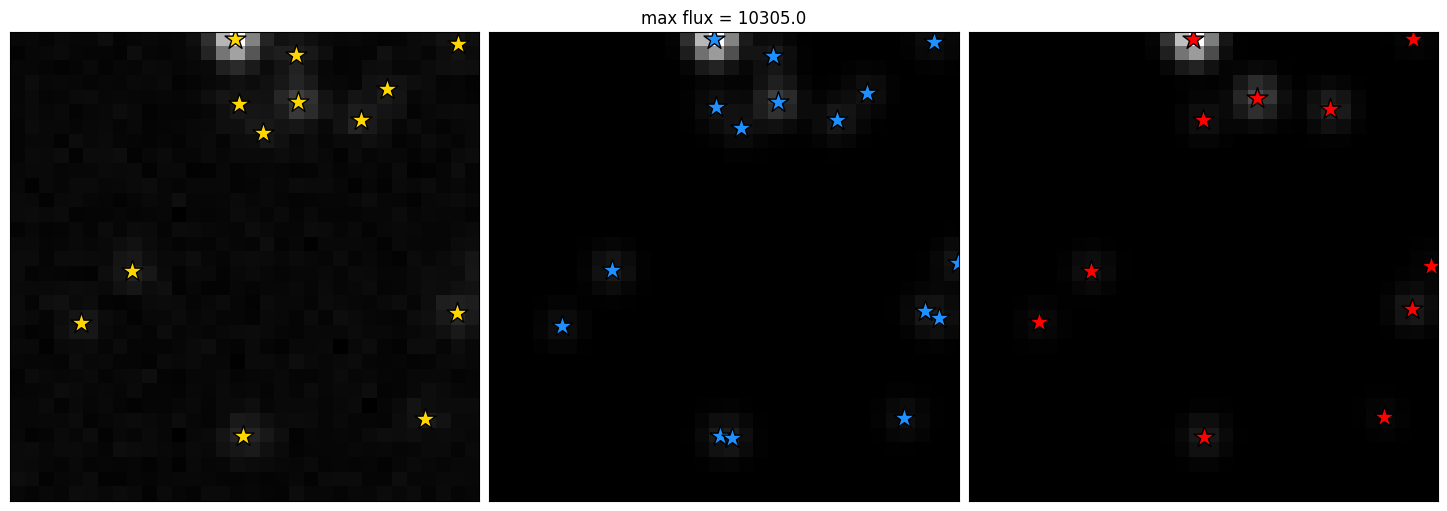

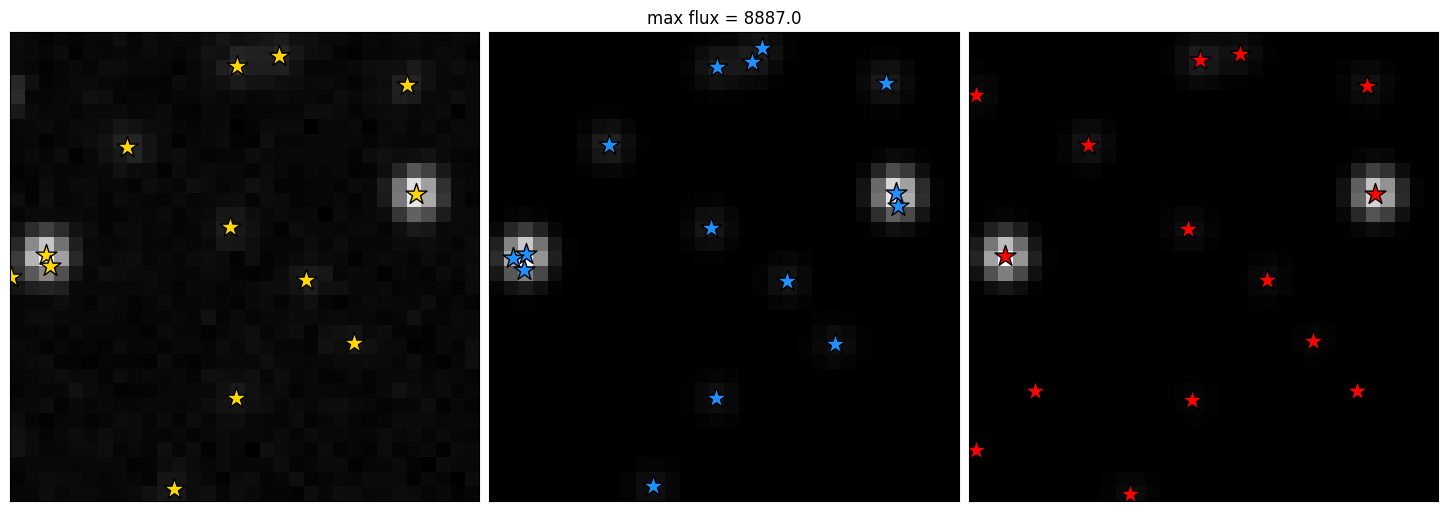

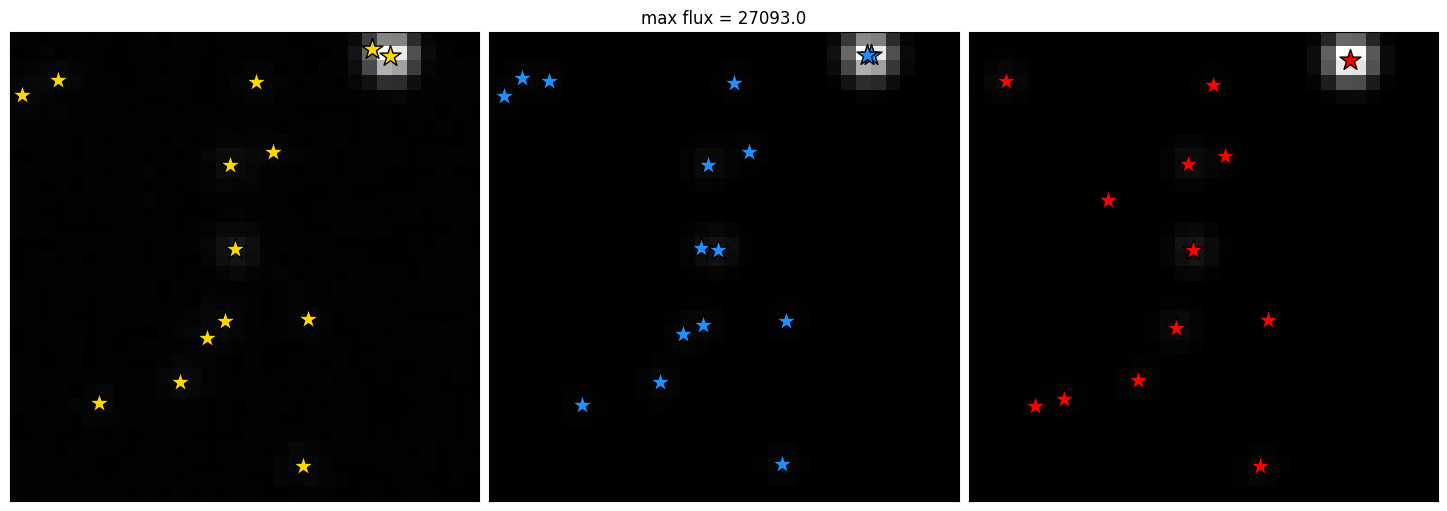

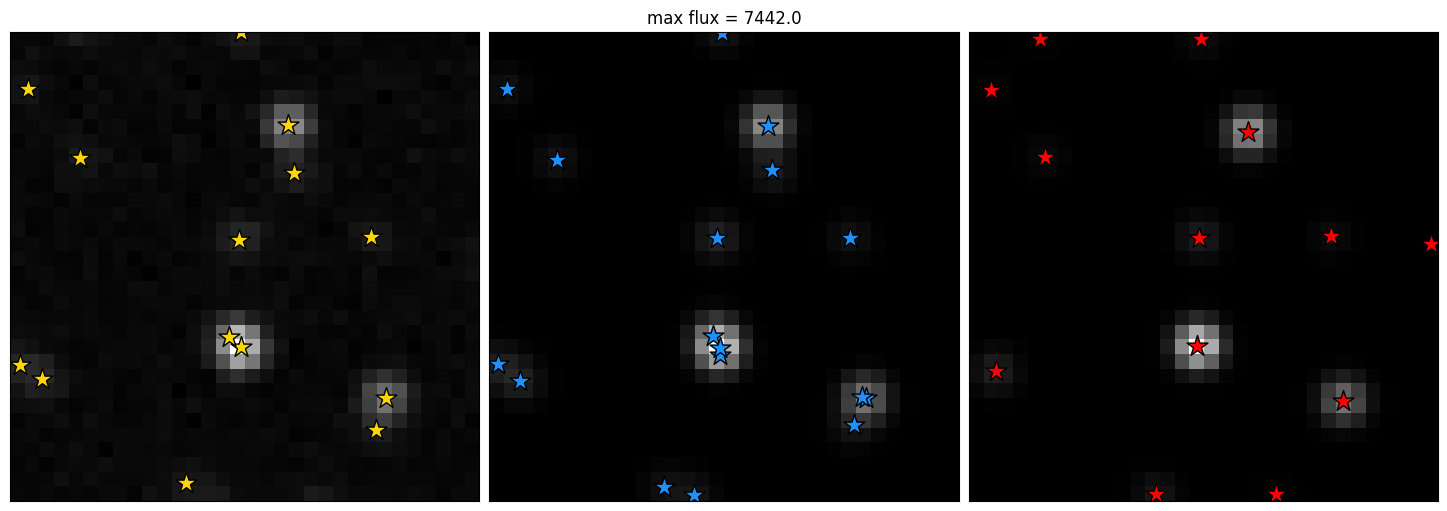

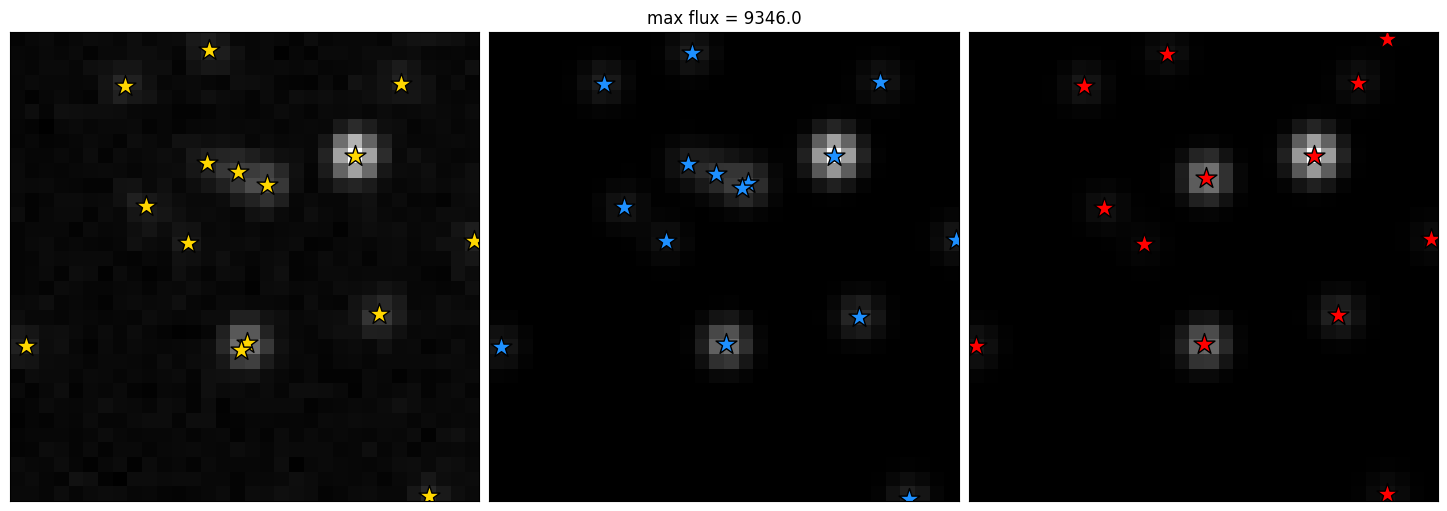

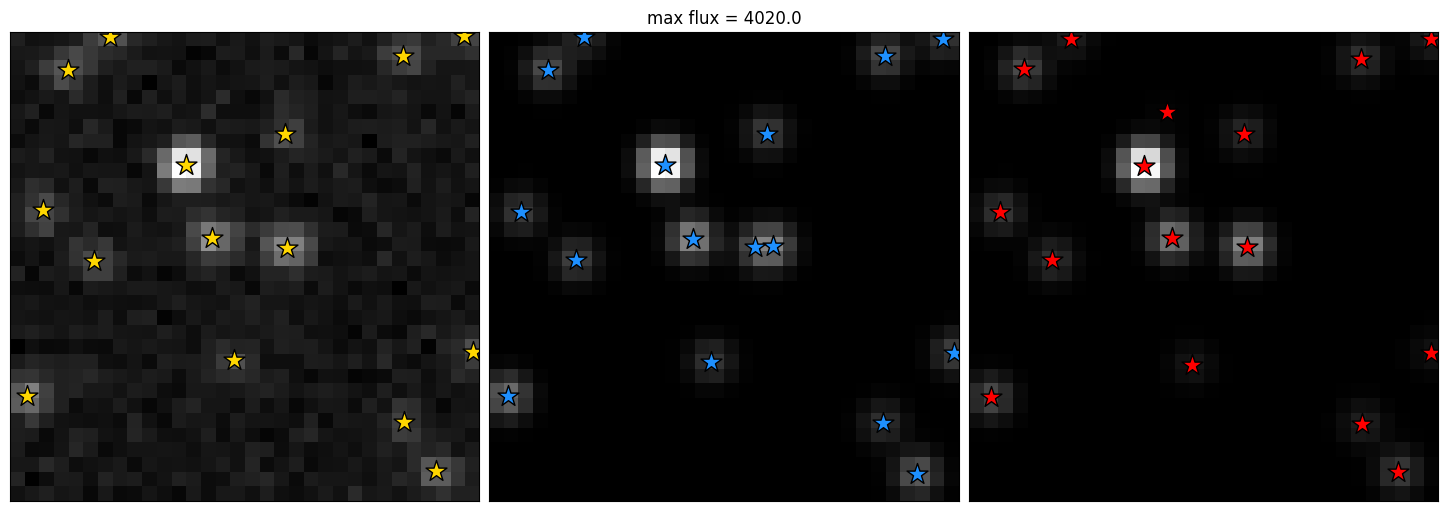

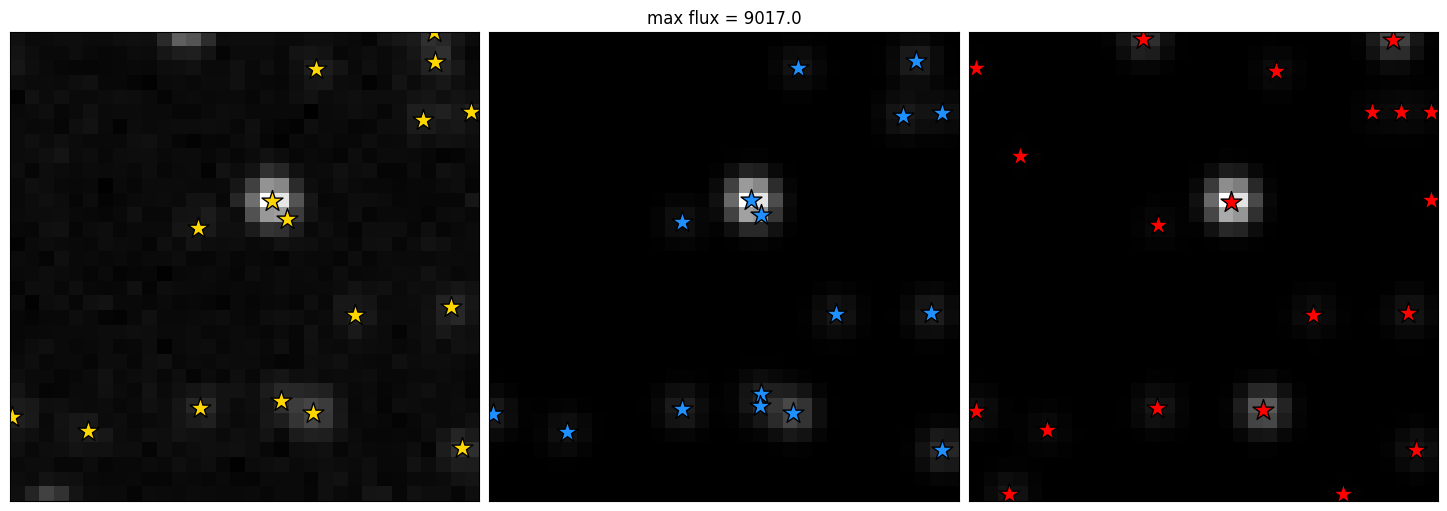

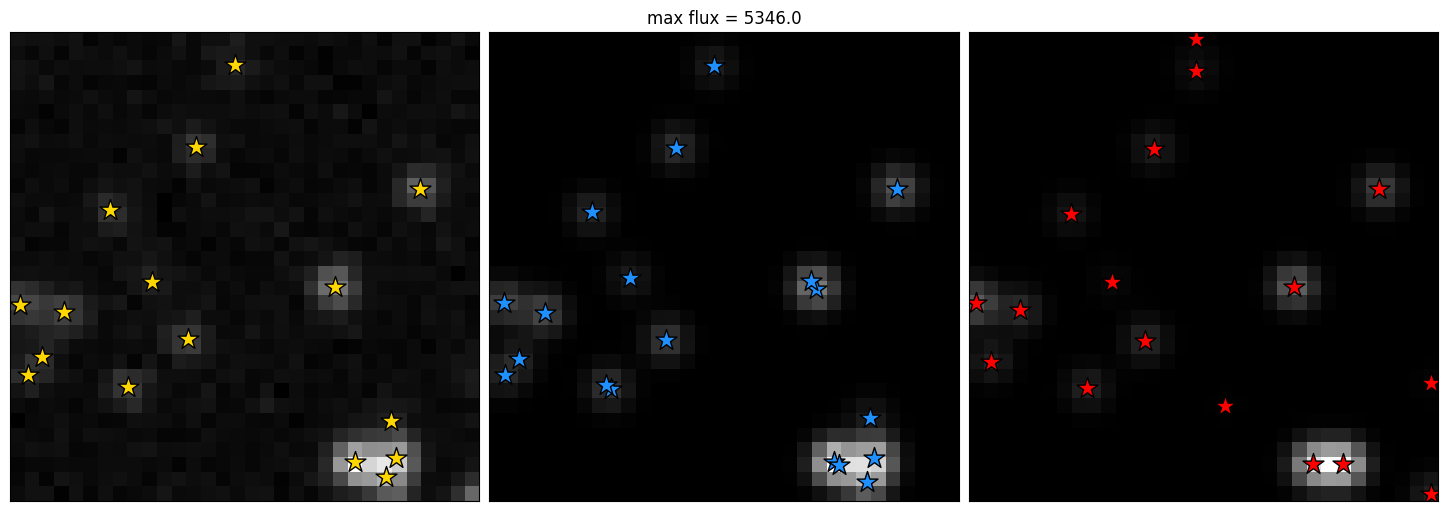

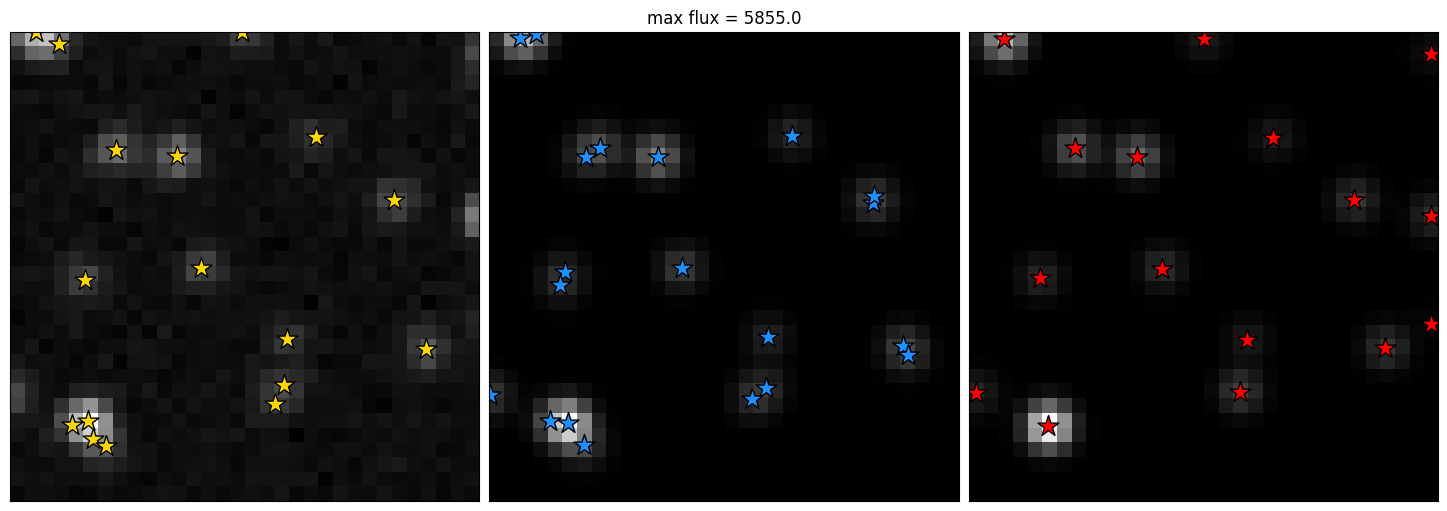

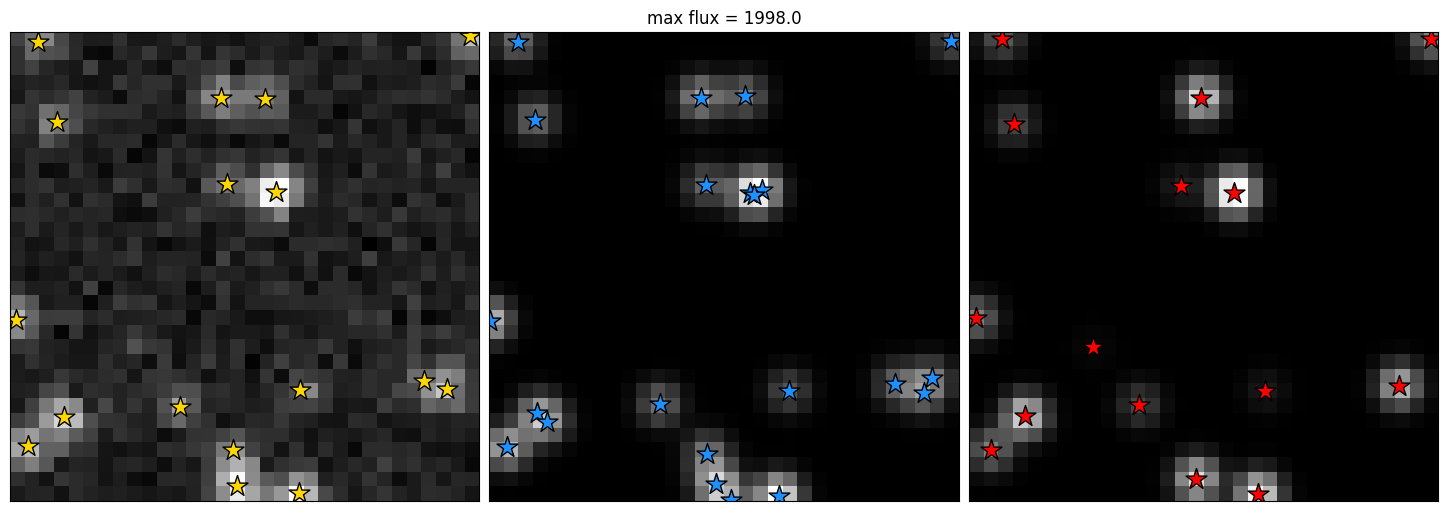

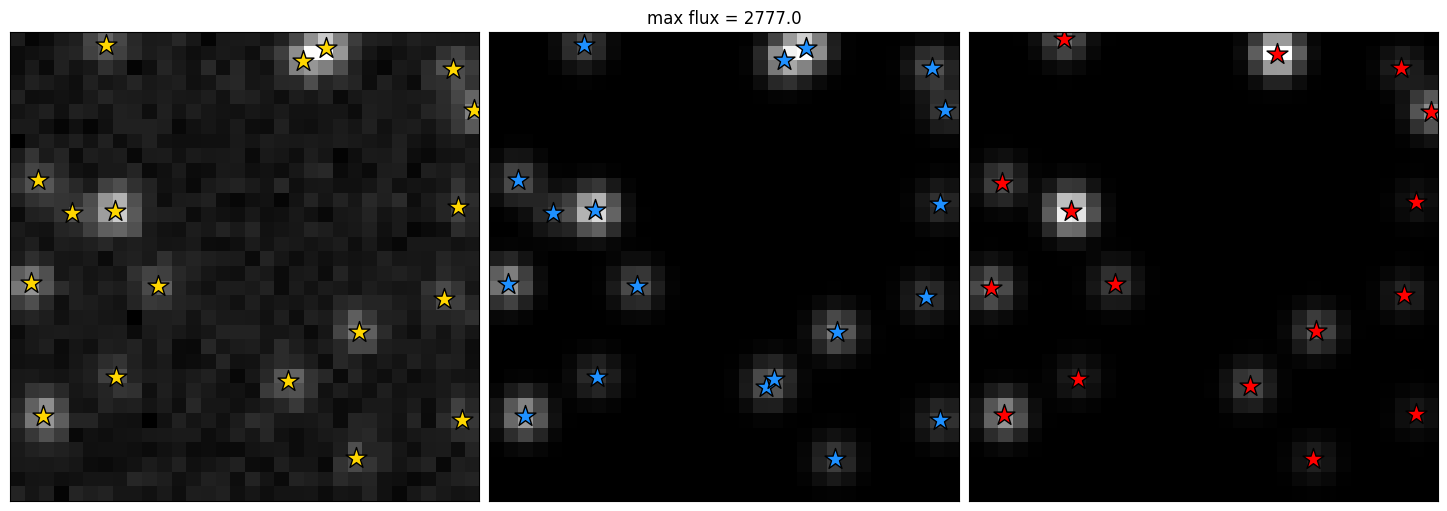

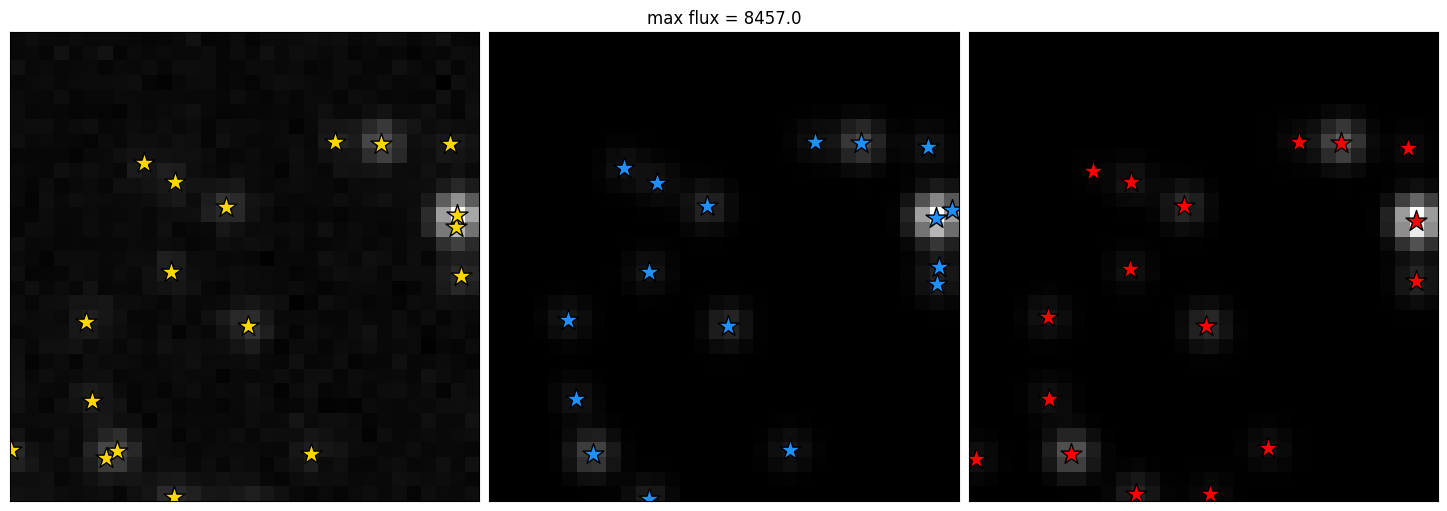

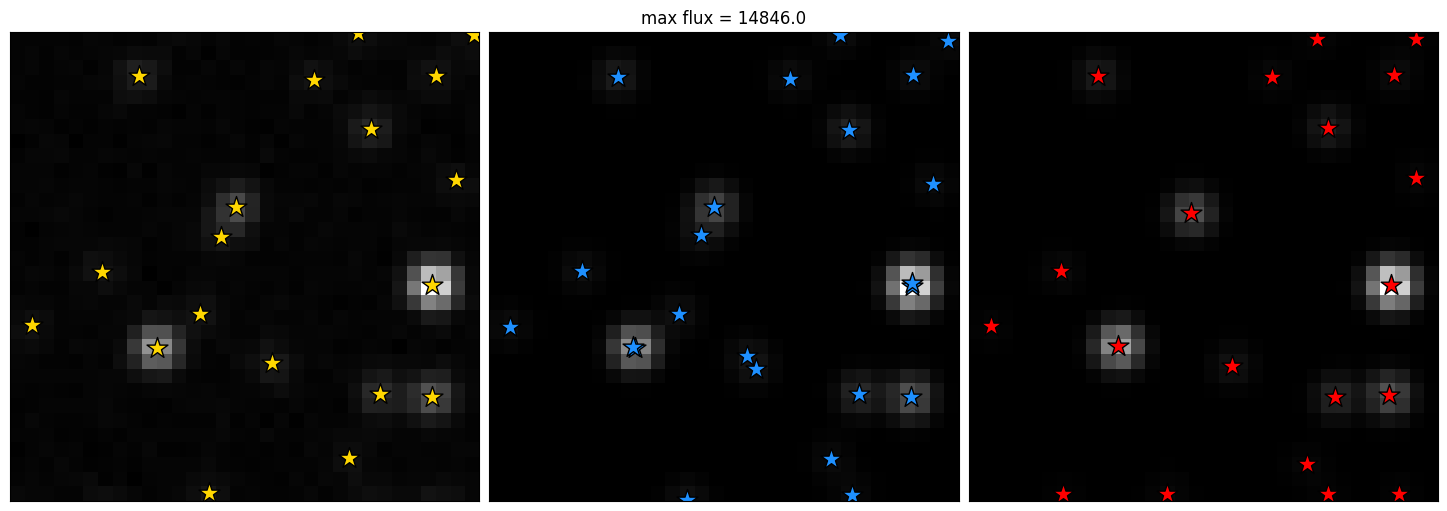

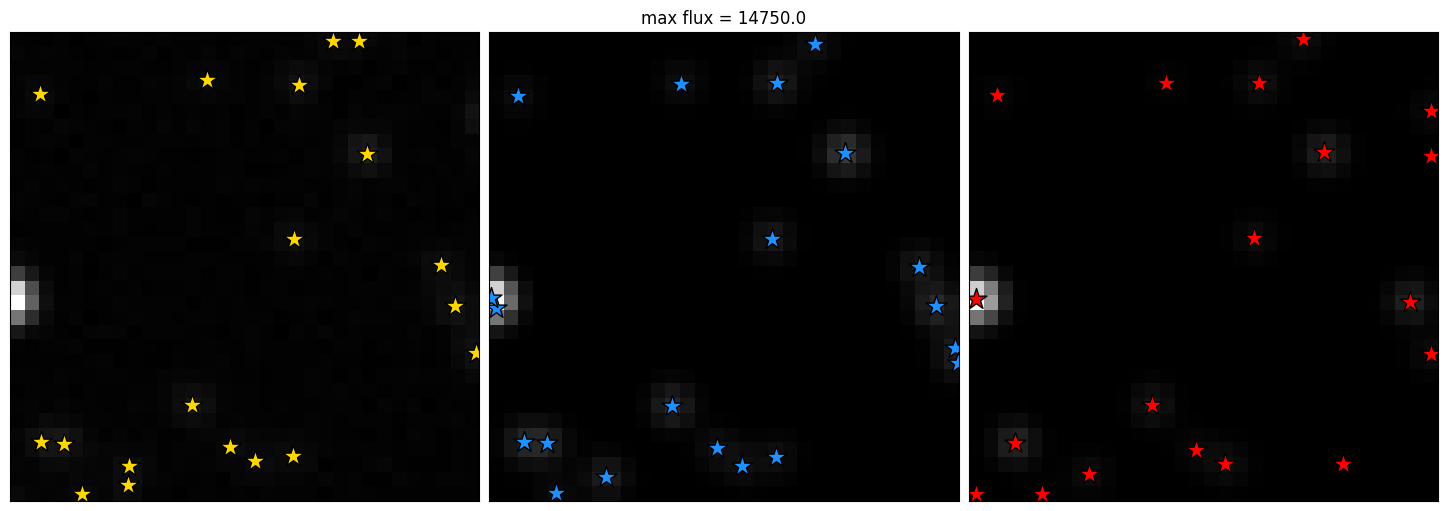

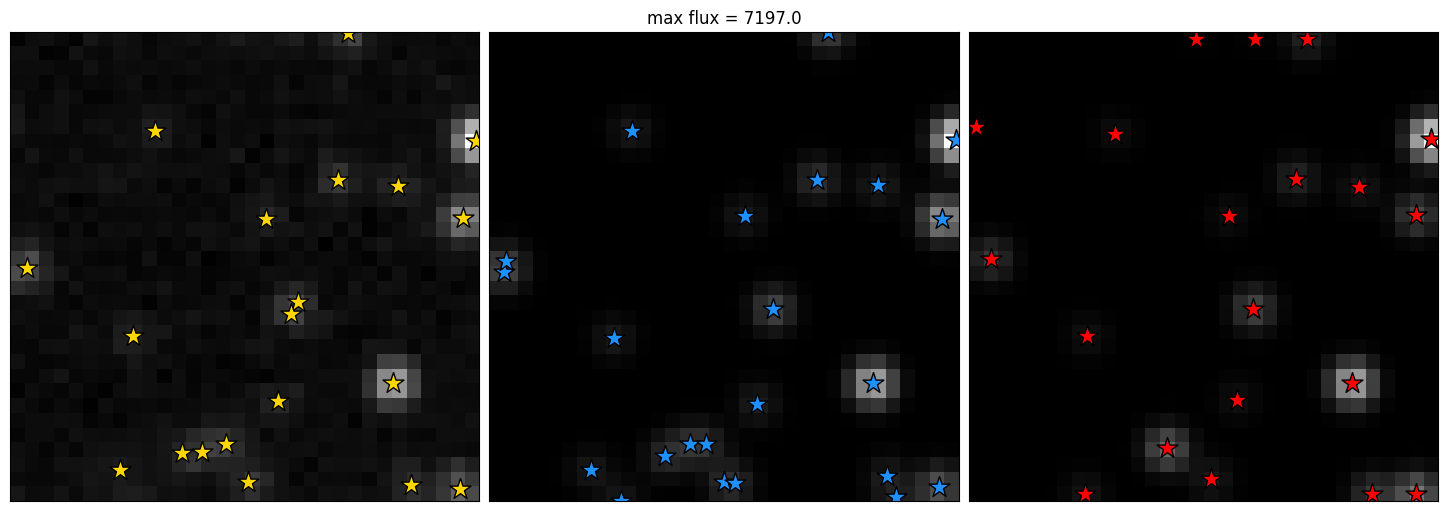

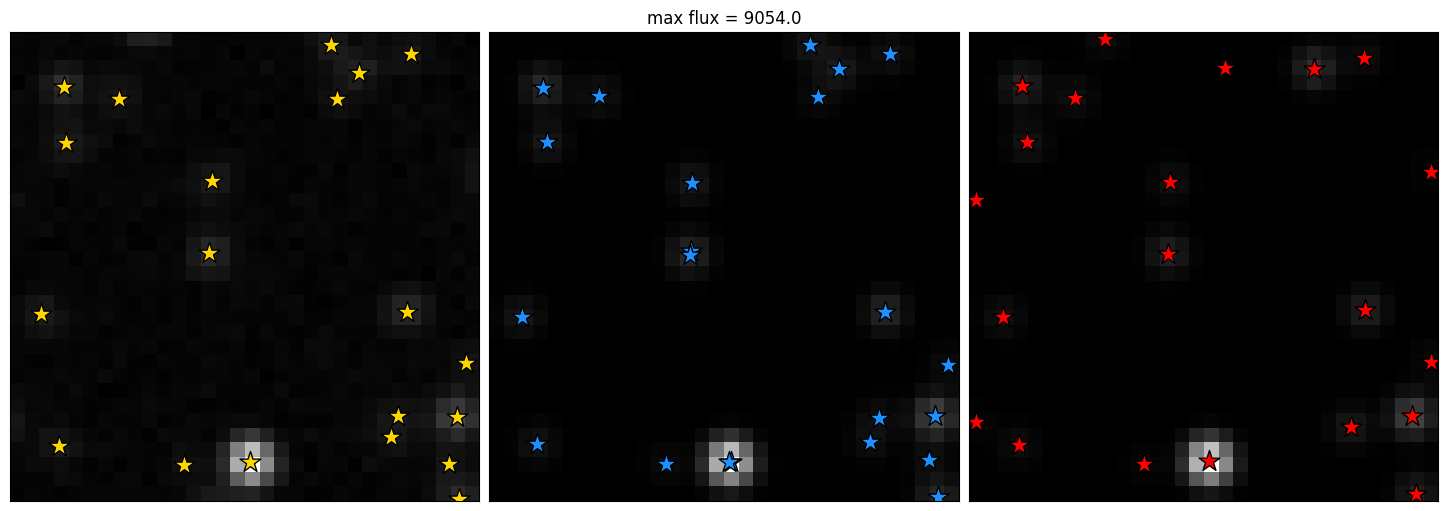

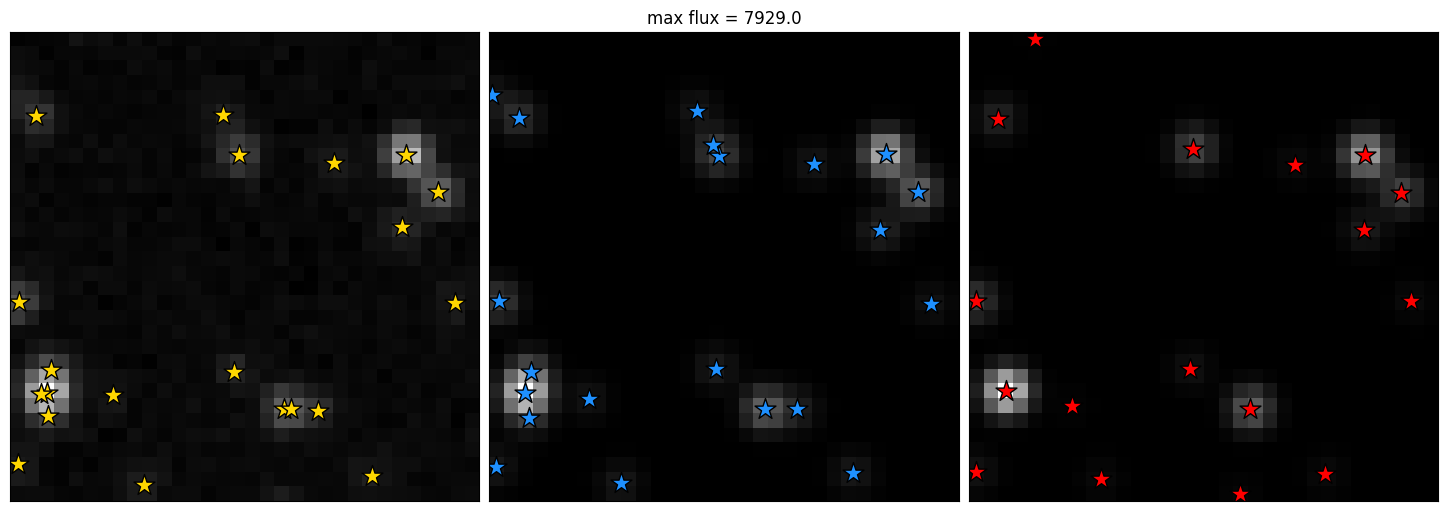

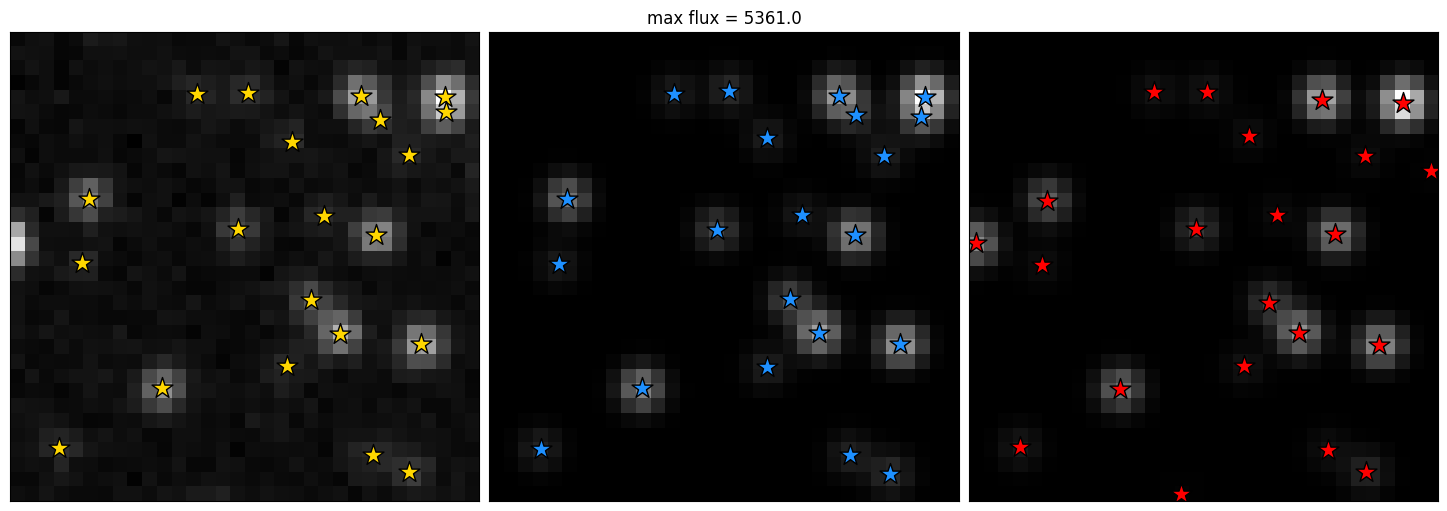

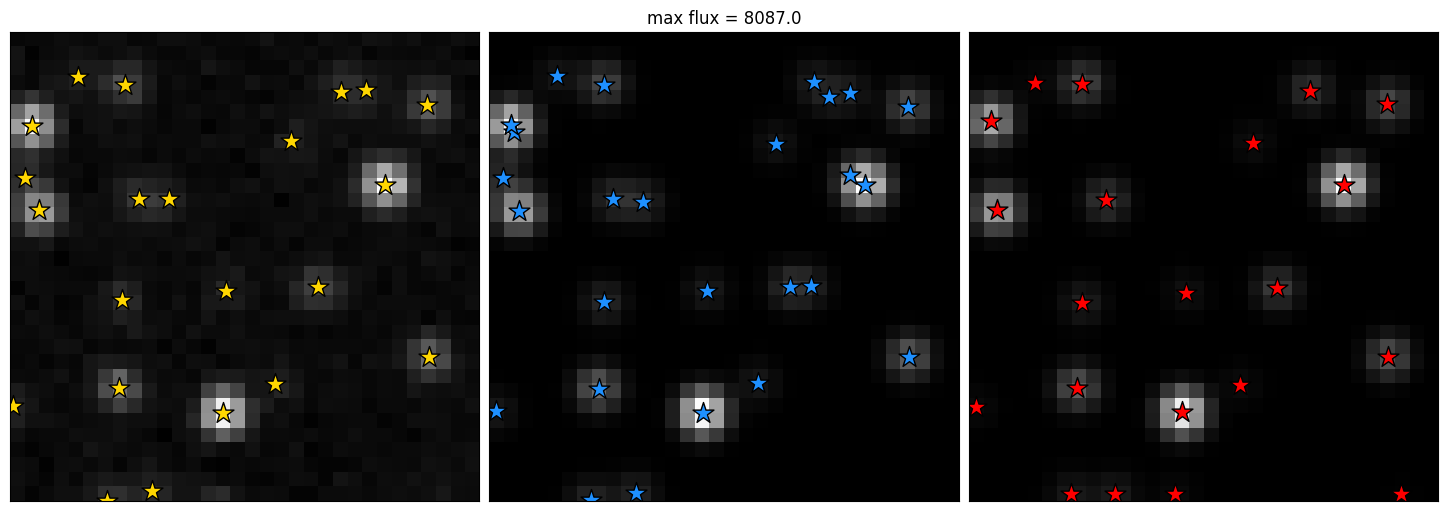

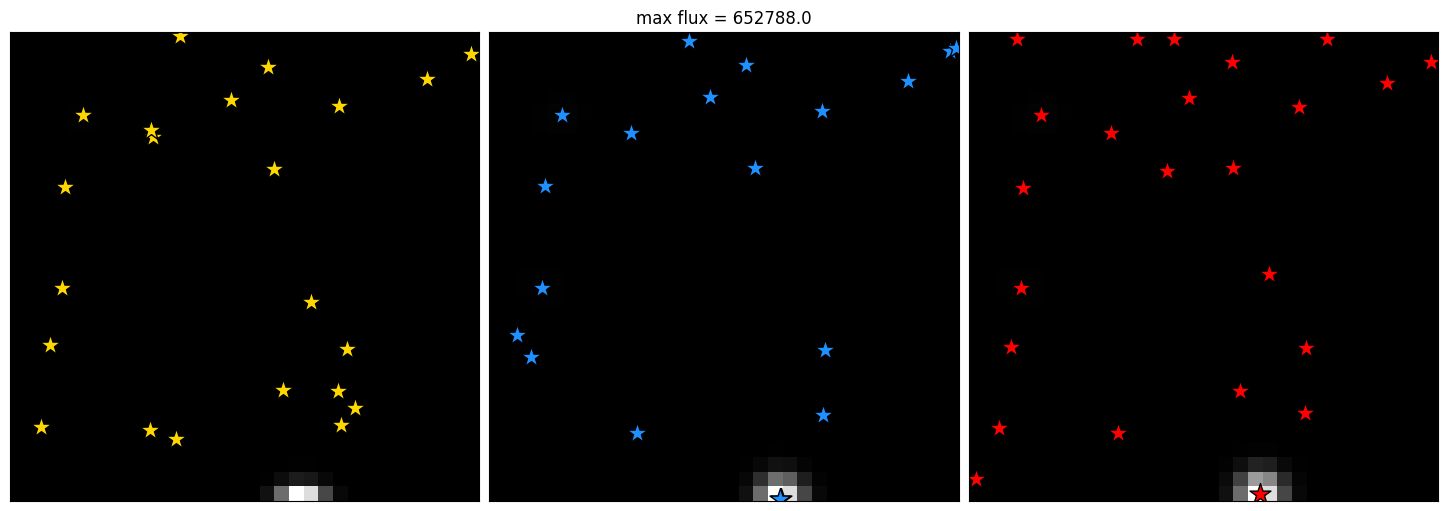

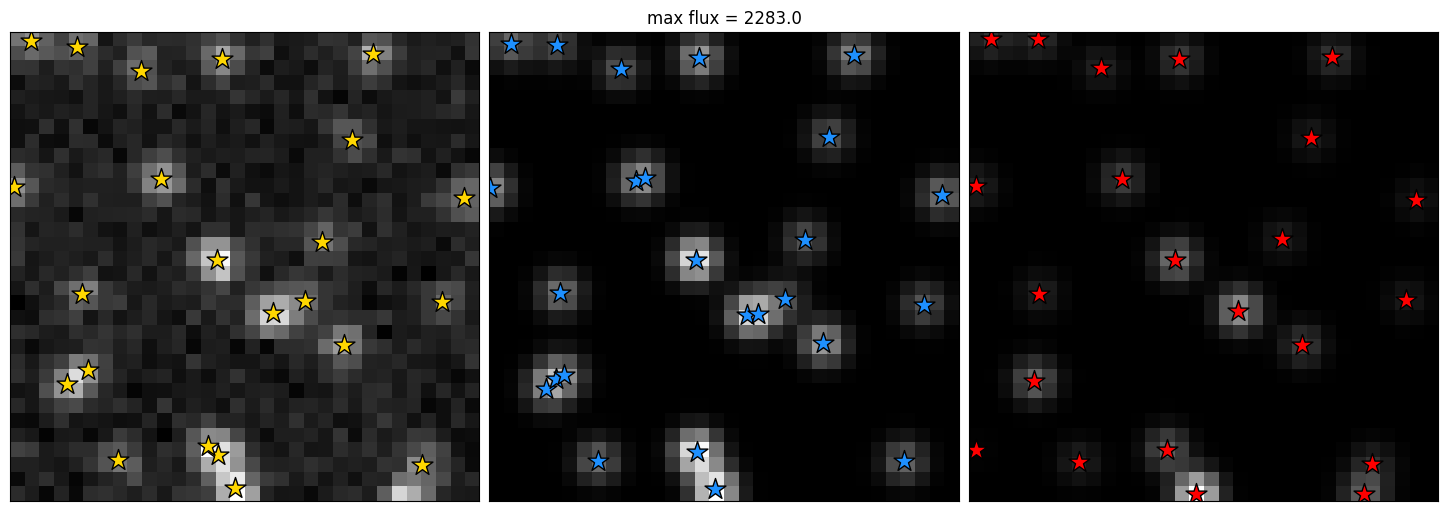

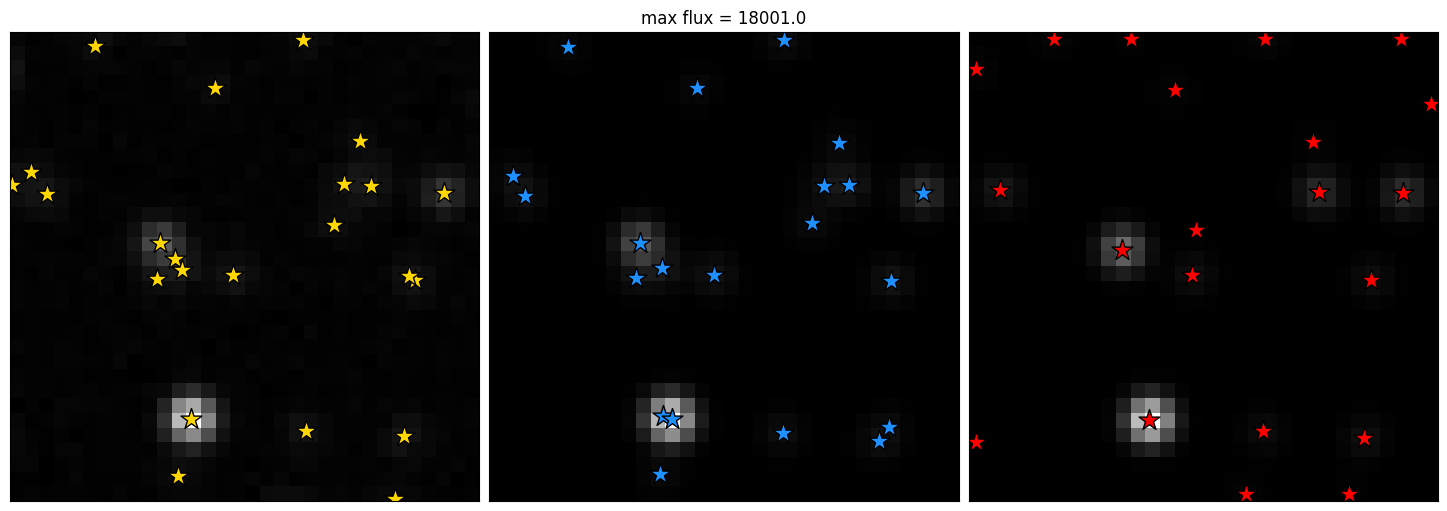

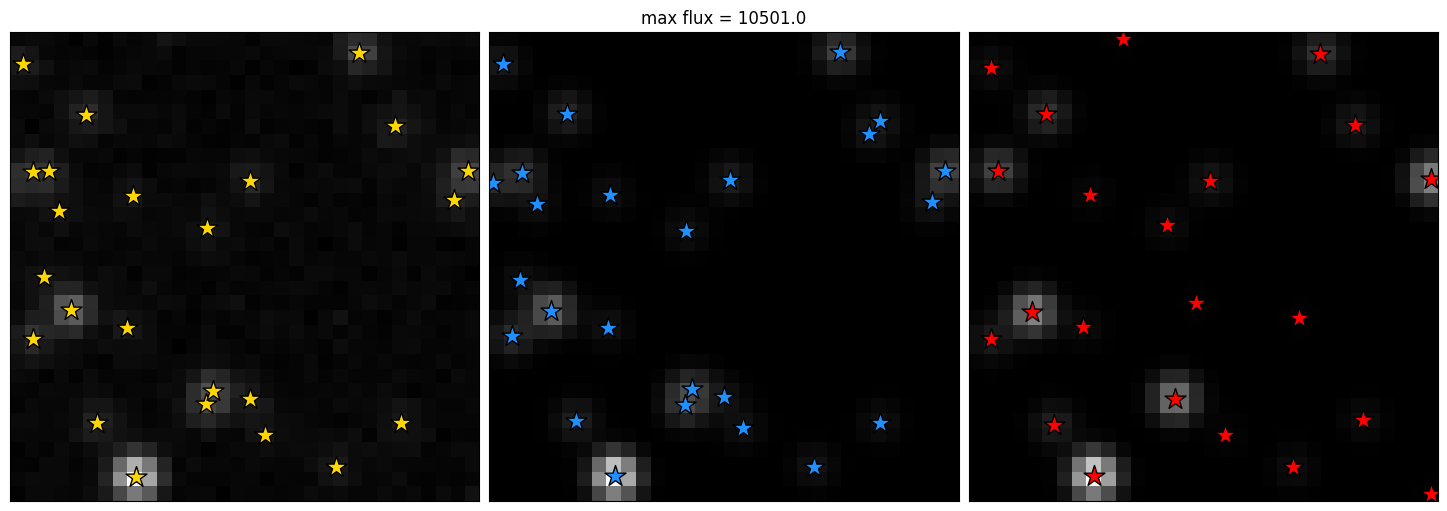

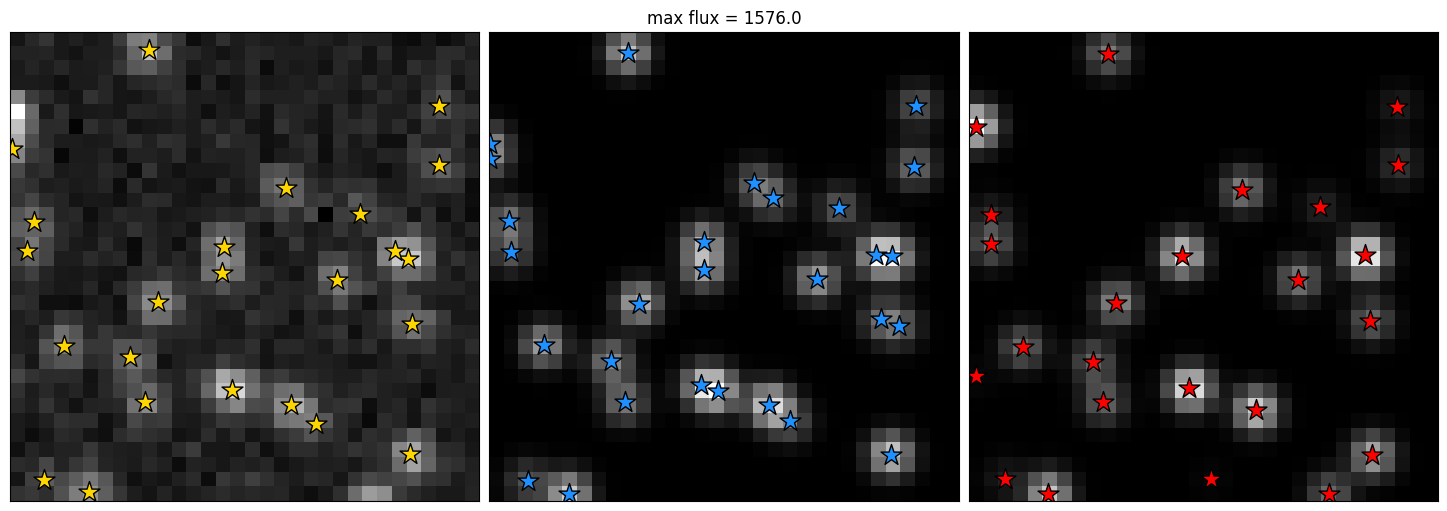

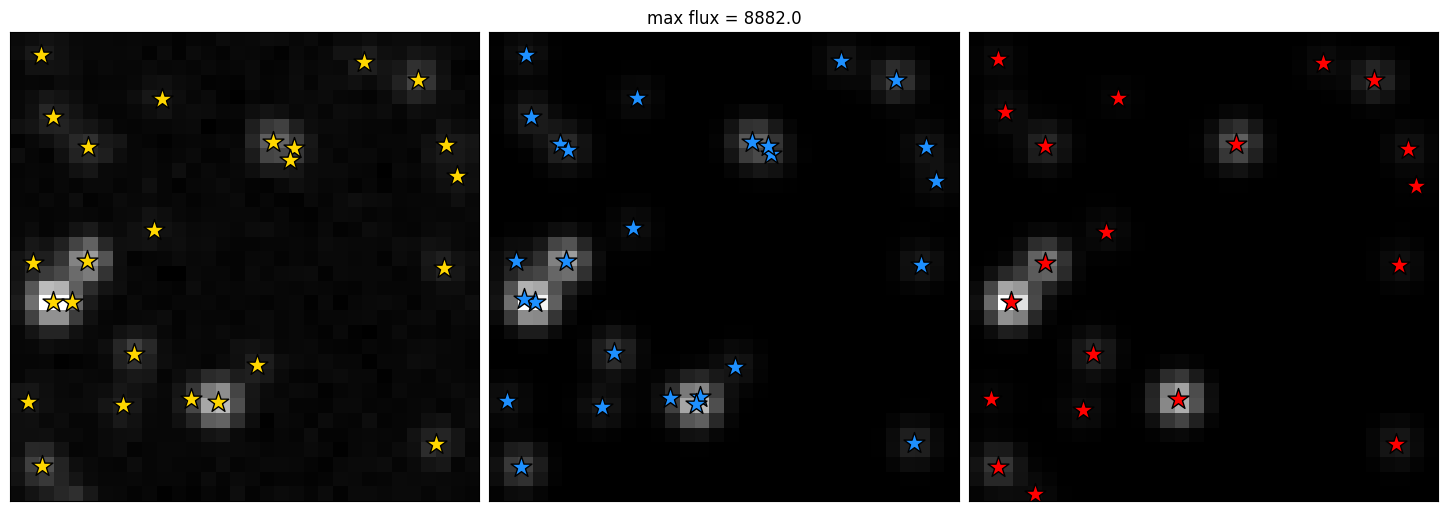

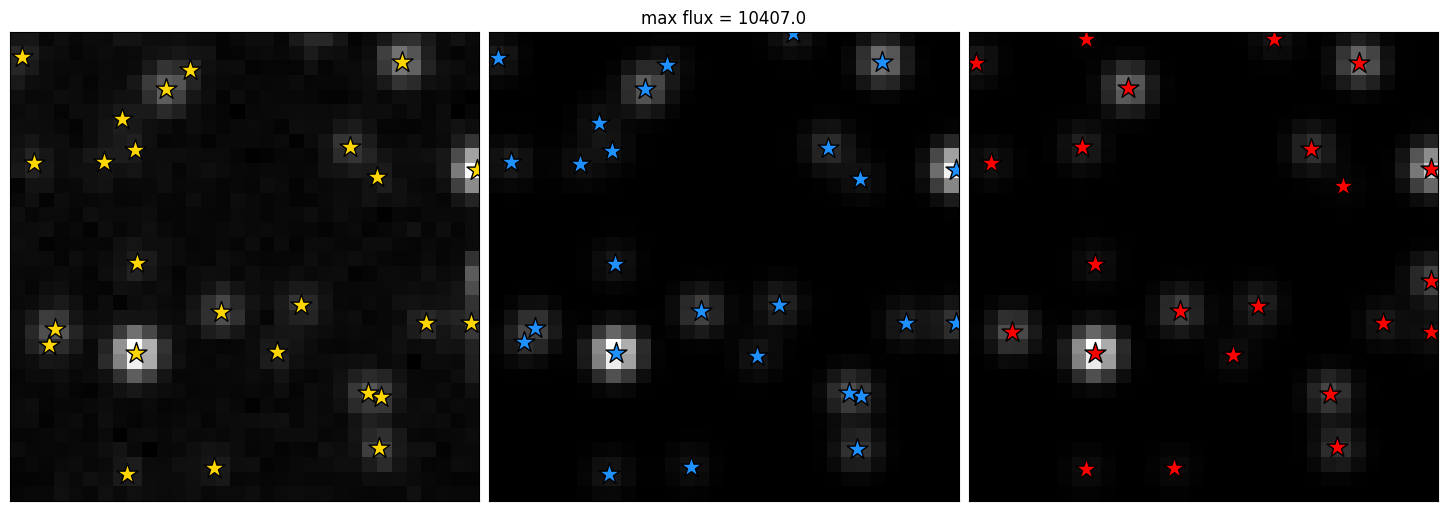

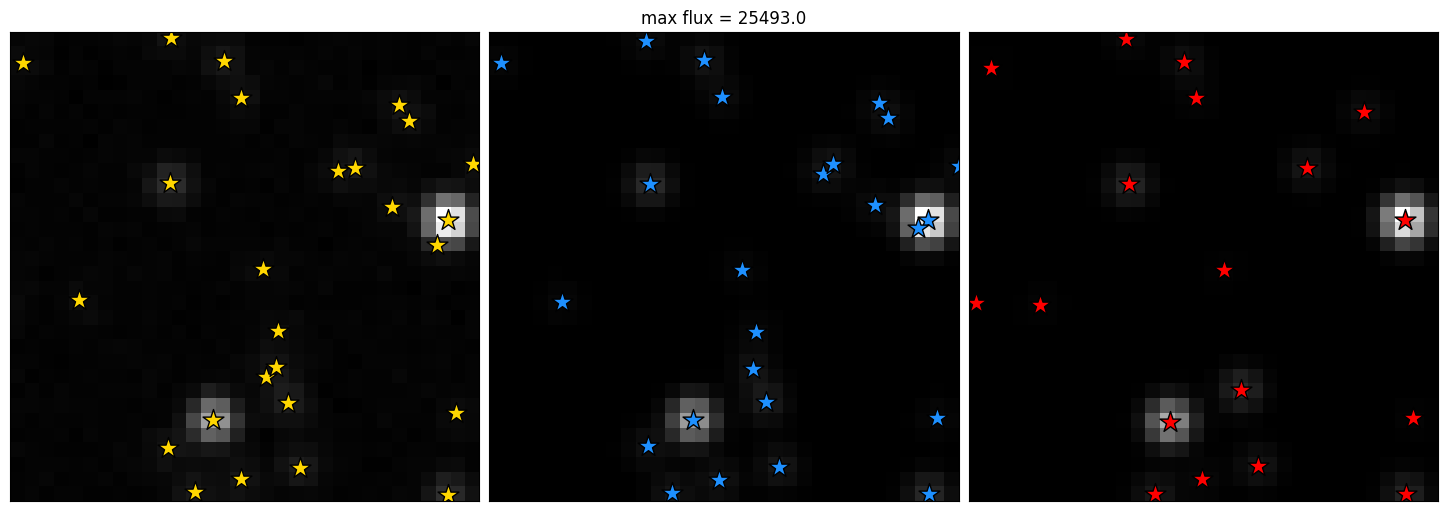

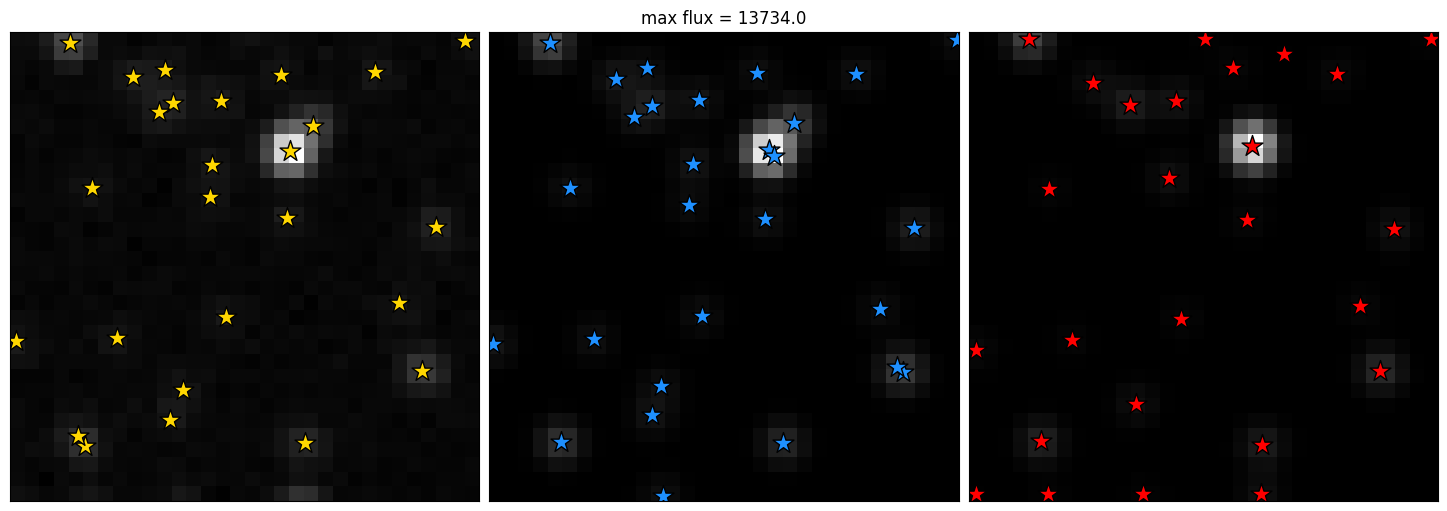

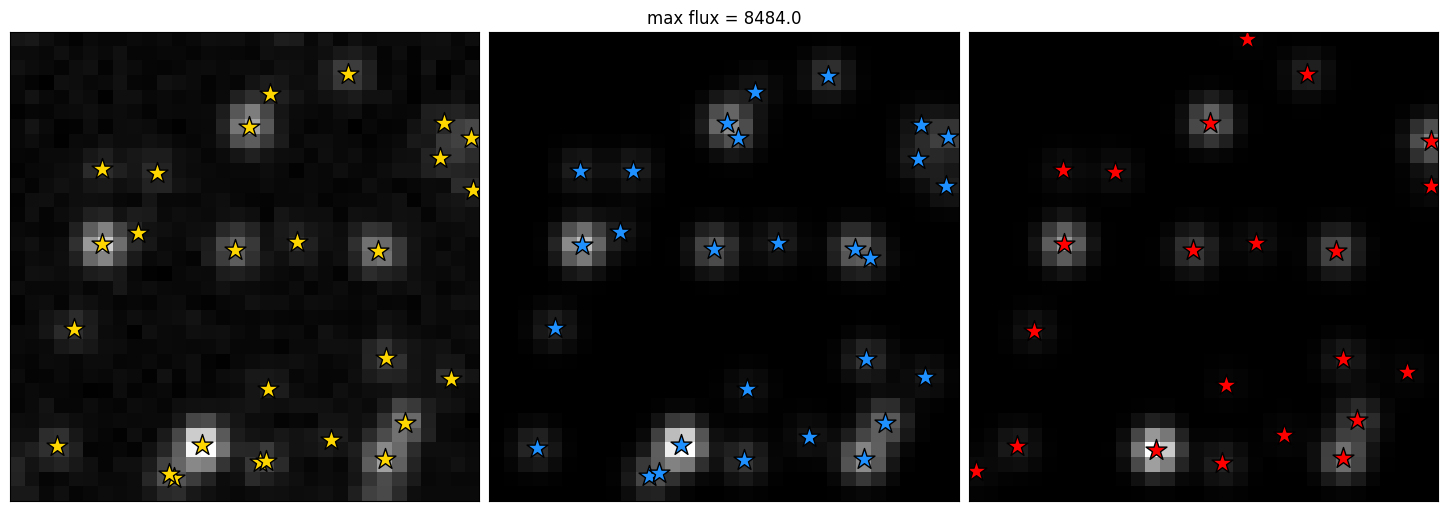

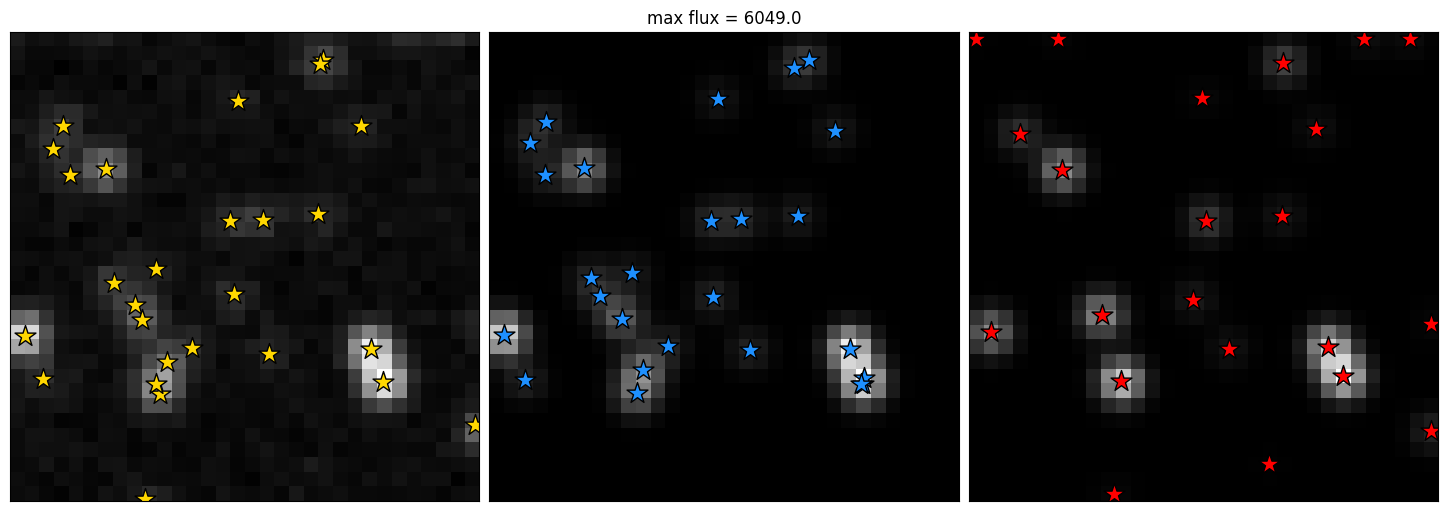

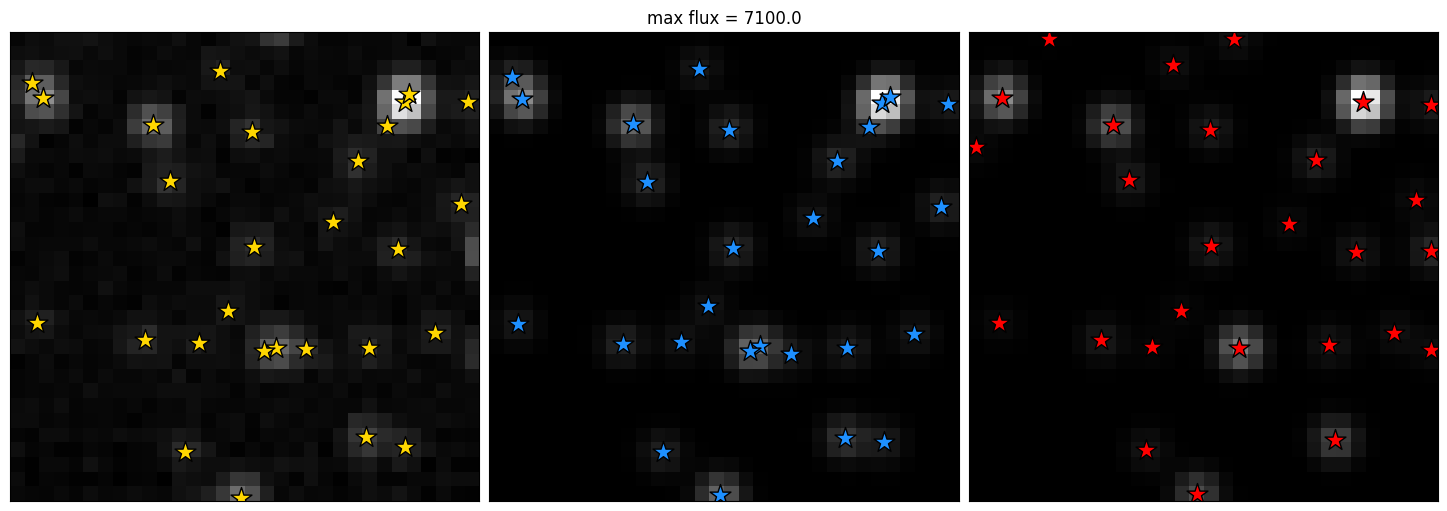

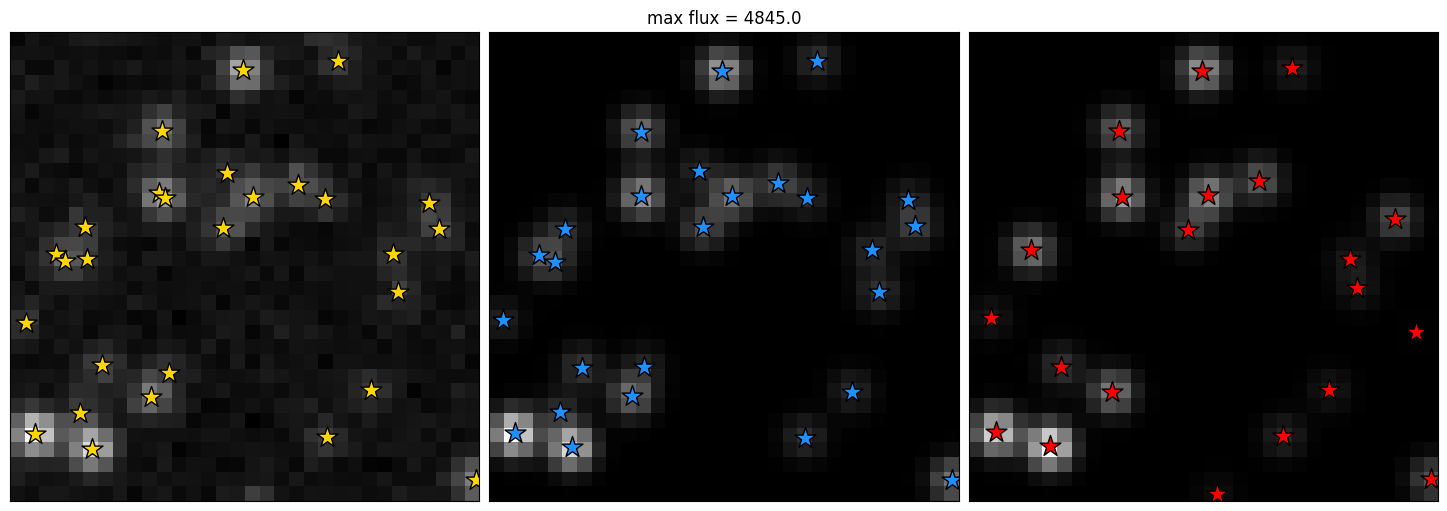

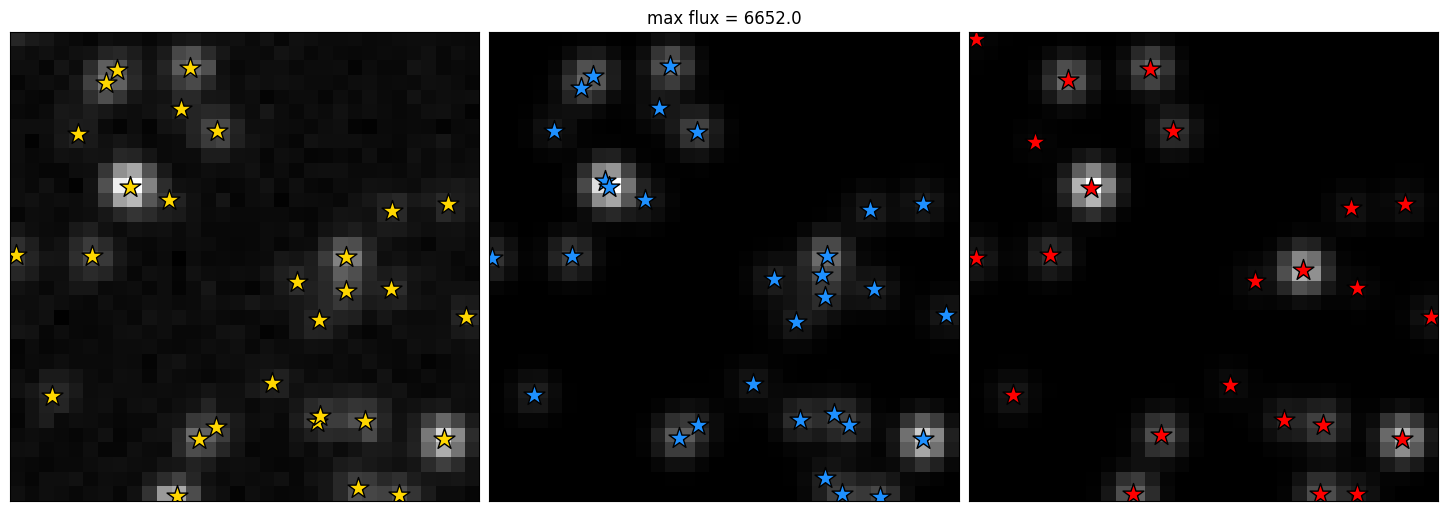

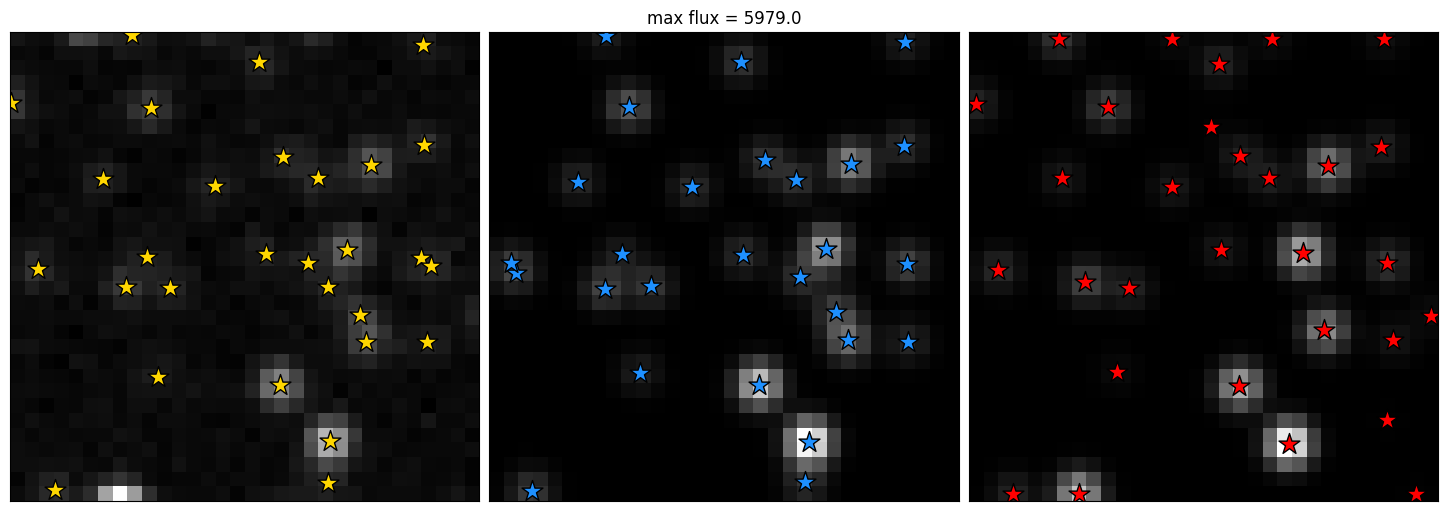

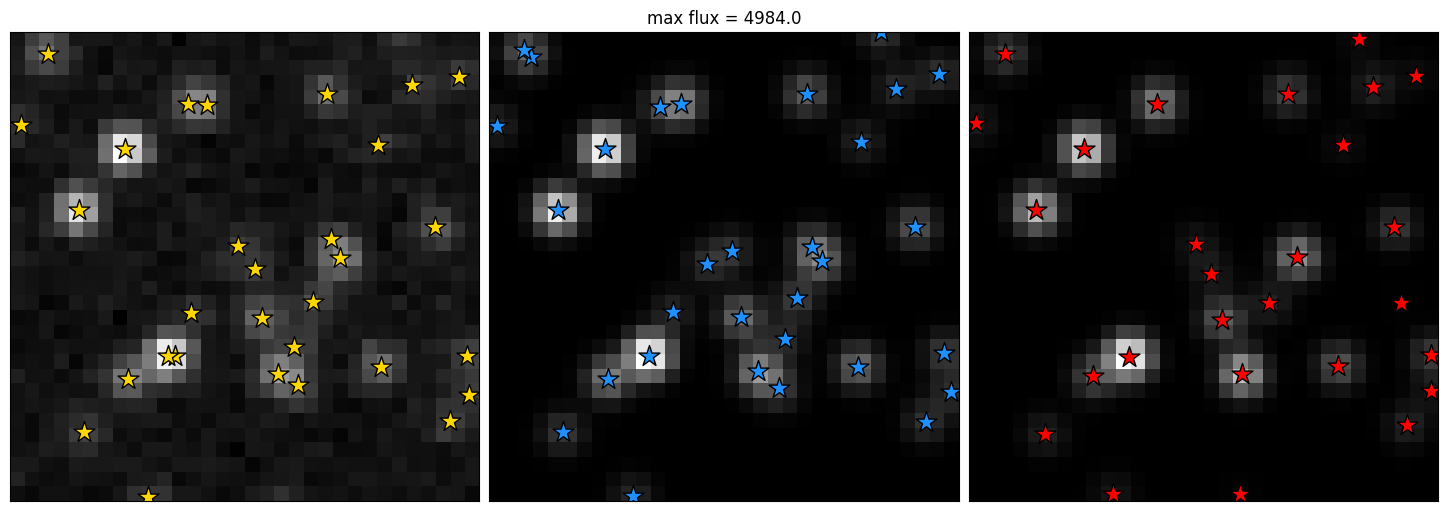

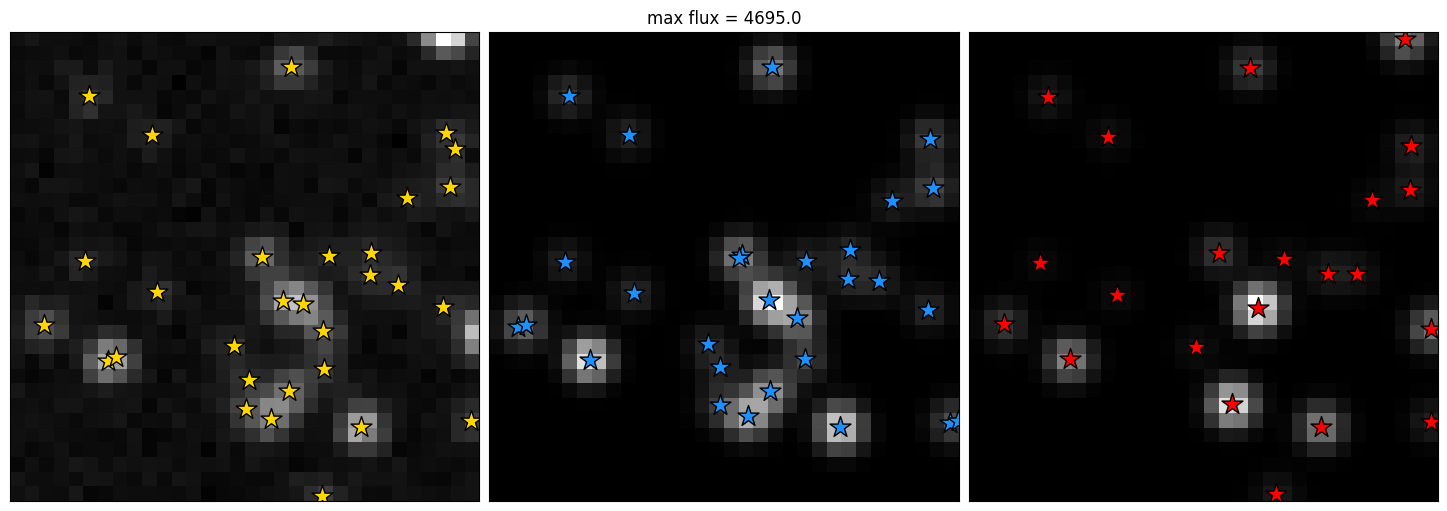

In [39]:
for c in range(num_counts):
    unique, num = smcmala_fluxes[image_indexes[c,0]].unique(dim = 0, return_counts = True)
    cat1 = unique[num.topk(k = 1).indices]
    cat_index = (smcmala_fluxes[image_indexes[c,0]] == cat1).all(dim = 1).nonzero()[0].item()
    plot_detections(image_indexes[c,0], cat_index)
    
    unique, num = smcmala_fluxes[image_indexes[c,1]].unique(dim = 0, return_counts = True)
    cat1 = unique[num.topk(k = 1).indices]
    cat_index = (smcmala_fluxes[image_indexes[c,1]] == cat1).all(dim = 1).nonzero()[0].item()
    plot_detections(image_indexes[c,1], cat_index)

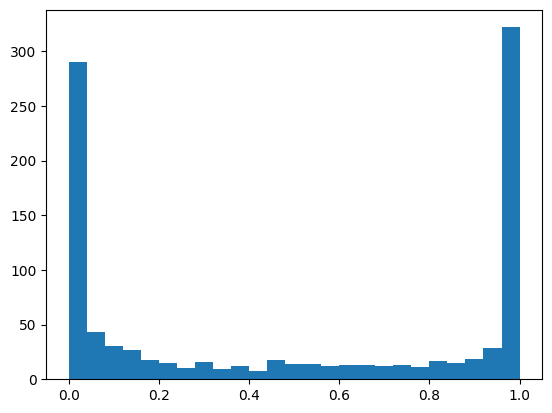

In [ ]:
# VSBC for counts
_ = plt.hist(((true_counts.unsqueeze(-1) < smcmala_counts) * 1.0).mean(-1), bins = 25)

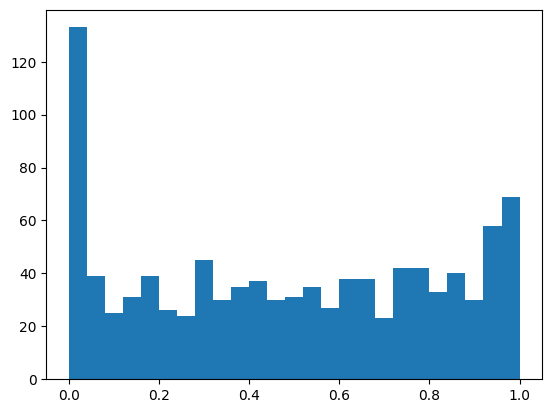

In [ ]:
# VSBC for total fluxes
_ = plt.hist(((true_fluxes.sum(-1).unsqueeze(-1) < smcmala_fluxes.sum(-1)) * 1.0).mean(-1), bins = 25)